In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
#učitavanje podataka
teams = pd.read_csv("teams.csv")
seasons = pd.read_csv("seasons.csv")
sample_submission = pd.read_csv("sample_submission.csv")
tourney_compact_results = pd.read_csv("tourney_compact_results.csv")
tourney_detailed_results = pd.read_csv("tourney_detailed_results.csv")
regular_season_compact_results = pd.read_csv("regular_season_compact_results.csv")
regular_season_detailed_results = pd.read_csv("regular_season_detailed_results.csv")
tourney_seeds = pd.read_csv("tourney_seeds.csv")
tourney_slots = pd.read_csv("tourney_slots.csv")

In [3]:
seasons = seasons[((seasons['season'] >= 2011) & (seasons['season'] < 2015))]

In [4]:
regular_season_compact_results = regular_season_compact_results[regular_season_compact_results['season'] >= 2011]
regular_season_compact_results.reset_index(drop=True, inplace=True)

In [5]:
regular_season_detailed_results = regular_season_detailed_results[regular_season_detailed_results['season'] >= 2011]
regular_season_detailed_results.reset_index(drop=True, inplace=True)

In [6]:
tourney_detailed_results = tourney_detailed_results[((tourney_detailed_results['season'] >= 2011) & (tourney_detailed_results['season'] < 2014))]
tourney_detailed_results.reset_index(drop=True, inplace=True)
tourney_detailed_results.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lfga3,lftm,lfta,lor,ldr,last,lto,lstl,lblk,lpf
0,2011,134,1155,70,1412,52,N,0,26,50,...,24,4,7,7,22,10,19,4,3,10
1,2011,134,1421,81,1114,77,N,1,27,54,...,29,20,26,7,26,19,16,6,2,24
2,2011,135,1427,70,1106,61,N,0,23,54,...,26,10,12,11,28,13,12,6,3,22
3,2011,135,1433,59,1425,46,N,0,20,59,...,9,15,25,5,26,4,15,2,6,20
4,2011,136,1139,60,1330,58,N,0,22,54,...,15,21,27,13,16,8,15,9,2,17


In [7]:
tourney_compact_results = tourney_compact_results[((tourney_compact_results['season'] >= 2011) & (tourney_compact_results['season'] < 2014))]
tourney_compact_results.reset_index(drop=True, inplace=True)
tourney_compact_results

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,2011,134,1155,70,1412,52,N,0
1,2011,134,1421,81,1114,77,N,1
2,2011,135,1427,70,1106,61,N,0
3,2011,135,1433,59,1425,46,N,0
4,2011,136,1139,60,1330,58,N,0
...,...,...,...,...,...,...,...,...
196,2013,146,1257,85,1181,63,N,0
197,2013,146,1276,79,1196,59,N,0
198,2013,152,1257,72,1455,68,N,0
199,2013,152,1276,61,1393,56,N,0


## Calculating points

In [8]:
regular_season_2011 = regular_season_compact_results[regular_season_compact_results['season'] == 2011]
tourney_season_2011 = tourney_compact_results[tourney_compact_results['season'] == 2011]

#points scored in regular season as winner
points_scored = regular_season_2011.groupby('wteam')['wscore'].sum().reset_index()

points_scored.columns = ['team_id', 'scored']

teams = pd.merge(teams, points_scored, how='left', left_on='team_id', right_on='team_id')

#points scored in regular season as loser
points_scored_lost = regular_season_2011.groupby('lteam')['lscore'].sum().reset_index()

points_scored_lost.columns = ['team_id', 'scored_lost']

teams = pd.merge(teams, points_scored_lost, how='left', left_on='team_id', right_on='team_id')

#points scored in tournament as winner
points_scored_tourn = tourney_season_2011.groupby('wteam')['wscore'].sum().reset_index()

points_scored_tourn.columns = ['team_id', 'scored_tourn']

teams = pd.merge(teams, points_scored_tourn, how='left', left_on='team_id', right_on='team_id')

#points scored in tournament as loser
points_scored_tourn_lost = tourney_season_2011.groupby('lteam')['lscore'].sum().reset_index()

points_scored_tourn_lost.columns = ['team_id', 'scored_tourn_lost']

teams = pd.merge(teams, points_scored_tourn_lost, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)

In [9]:
teams['pts'] = teams['scored'] + teams['scored_lost'] + teams['scored_tourn'] + teams['scored_tourn_lost']
teams.drop(columns=['scored', 'scored_lost', 'scored_tourn', 'scored_tourn_lost'], inplace=True)
teams_2011 = teams[teams['pts'] > 0]
teams.drop(columns=['pts'], inplace=True)
teams_2011

,team_id,team_name,pts
1,1102,Air Force,1799.0
2,1103,Akron,2435.0
3,1104,Alabama,2133.0
4,1105,Alabama A&M,1570.0
5,1106,Alabama St,2031.0
...,...,...,...
359,1460,Wright St,1988.0
360,1461,Wyoming,1872.0
361,1462,Xavier,2306.0
362,1463,Yale,1823.0


In [10]:
regular_season_2012 = regular_season_compact_results[regular_season_compact_results['season'] == 2012]
tourney_season_2012 = tourney_compact_results[tourney_compact_results['season'] == 2012]

#points scored in regular season as winner
points_scored = regular_season_2012.groupby('wteam')['wscore'].sum().reset_index()

points_scored.columns = ['team_id', 'scored']

teams = pd.merge(teams, points_scored, how='left', left_on='team_id', right_on='team_id')

#points scored in regular season as loser
points_scored_lost = regular_season_2012.groupby('lteam')['lscore'].sum().reset_index()

points_scored_lost.columns = ['team_id', 'scored_lost']

teams = pd.merge(teams, points_scored_lost, how='left', left_on='team_id', right_on='team_id')

#points scored in tournament as winner
points_scored_tourn = tourney_season_2012.groupby('wteam')['wscore'].sum().reset_index()

points_scored_tourn.columns = ['team_id', 'scored_tourn']

teams = pd.merge(teams, points_scored_tourn, how='left', left_on='team_id', right_on='team_id')

#points scored in tournament as loser
points_scored_tourn_lost = tourney_season_2012.groupby('lteam')['lscore'].sum().reset_index()

points_scored_tourn_lost.columns = ['team_id', 'scored_tourn_lost']

teams = pd.merge(teams, points_scored_tourn_lost, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)


In [11]:
teams['pts'] = teams['scored'] + teams['scored_lost'] + teams['scored_tourn'] + teams['scored_tourn_lost']
teams.drop(columns=['scored', 'scored_lost', 'scored_tourn', 'scored_tourn_lost'], inplace=True)
teams_2012 = teams[teams['pts'] > 0]
teams.drop(columns=['pts'], inplace=True)
teams_2012

,team_id,team_name,pts
1,1102,Air Force,1638.0
2,1103,Akron,2287.0
3,1104,Alabama,2135.0
4,1105,Alabama A&M,1589.0
5,1106,Alabama St,1674.0
...,...,...,...
359,1460,Wright St,1777.0
360,1461,Wyoming,1809.0
361,1462,Xavier,2543.0
362,1463,Yale,1733.0


In [12]:
regular_season_2013 = regular_season_compact_results[regular_season_compact_results['season'] == 2013]
tourney_season_2013 = tourney_compact_results[tourney_compact_results['season'] == 2013]

#points scored in regular season as winner
points_scored = regular_season_2013.groupby('wteam')['wscore'].sum().reset_index()

points_scored.columns = ['team_id', 'scored']

teams = pd.merge(teams, points_scored, how='left', left_on='team_id', right_on='team_id')

#points scored in regular season as loser
points_scored_lost = regular_season_2013.groupby('lteam')['lscore'].sum().reset_index()

points_scored_lost.columns = ['team_id', 'scored_lost']

teams = pd.merge(teams, points_scored_lost, how='left', left_on='team_id', right_on='team_id')

#points scored in tournament as winner
points_scored_tourn = tourney_season_2013.groupby('wteam')['wscore'].sum().reset_index()

points_scored_tourn.columns = ['team_id', 'scored_tourn']

teams = pd.merge(teams, points_scored_tourn, how='left', left_on='team_id', right_on='team_id')

#points scored in tournament as loser
points_scored_tourn_lost = tourney_season_2013.groupby('lteam')['lscore'].sum().reset_index()

points_scored_tourn_lost.columns = ['team_id', 'scored_tourn_lost']

teams = pd.merge(teams, points_scored_tourn_lost, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)

teams['pts'] = teams['scored'] + teams['scored_lost'] + teams['scored_tourn'] + teams['scored_tourn_lost']
teams.drop(columns=['scored', 'scored_lost', 'scored_tourn', 'scored_tourn_lost'], inplace=True)
teams_2013 = teams[teams['pts'] > 0]
teams.drop(columns=['pts'], inplace=True)
teams_2013

,team_id,team_name,pts
1,1102,Air Force,1930.0
2,1103,Akron,2272.0
3,1104,Alabama,2003.0
4,1105,Alabama A&M,1786.0
5,1106,Alabama St,1906.0
...,...,...,...
359,1460,Wright St,1977.0
360,1461,Wyoming,1804.0
361,1462,Xavier,2021.0
362,1463,Yale,1863.0


In [13]:
regular_season_2014 = regular_season_compact_results[regular_season_compact_results['season'] == 2014]

#points scored in regular season as winner
points_scored = regular_season_2014.groupby('wteam')['wscore'].sum().reset_index()

points_scored.columns = ['team_id', 'scored']

teams = pd.merge(teams, points_scored, how='left', left_on='team_id', right_on='team_id')

#points scored in regular season as loser
points_scored_lost = regular_season_2014.groupby('lteam')['lscore'].sum().reset_index()

points_scored_lost.columns = ['team_id', 'scored_lost']

teams = pd.merge(teams, points_scored_lost, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)

teams['pts'] = teams['scored'] + teams['scored_lost']
teams.drop(columns=['scored', 'scored_lost'], inplace=True)
teams_2014 = teams[teams['pts'] > 0]
teams.drop(columns=['pts'], inplace=True)
teams_2014

,team_id,team_name,pts
0,1101,Abilene Chr,1326.0
1,1102,Air Force,1808.0
2,1103,Akron,2241.0
3,1104,Alabama,2068.0
4,1105,Alabama A&M,1787.0
...,...,...,...
359,1460,Wright St,2127.0
360,1461,Wyoming,1939.0
361,1462,Xavier,2383.0
362,1463,Yale,1777.0


## Calculating steals

In [14]:
regular_detailed_2011 = regular_season_detailed_results[regular_season_detailed_results['season'] == 2011]
tourney_detailed_2011 = tourney_detailed_results[tourney_detailed_results['season'] == 2011]

#steals made as winner in regular season
steals = regular_detailed_2011.groupby('wteam')['wstl'].sum().reset_index()

steals.columns = ['team_id', 'steals']

teams = pd.merge(teams, steals, how='left', left_on='team_id', right_on='team_id')

games_played = regular_detailed_2011.groupby('wteam')['wstl'].count()

#steals made as loser in regular season
steals_l = regular_detailed_2011.groupby('lteam')['lstl'].sum().reset_index()

steals_l.columns = ['team_id', 'steals_l']

teams = pd.merge(teams, steals_l, how='left', left_on='team_id', right_on='team_id')

games_played = regular_detailed_2011.groupby('lteam')['lstl'].count()

#steals made in tournament as winner
steals_tourn = tourney_detailed_2011.groupby('wteam')['wstl'].sum().reset_index()

steals_tourn.columns = ['team_id', 'steals_tourn']

teams = pd.merge(teams, steals_tourn, how='left', left_on='team_id', right_on='team_id')

#steals made in tournament as loser
steals_tourn_l = tourney_detailed_2011.groupby('lteam')['lstl'].sum().reset_index()

steals_tourn_l.columns = ['team_id', 'steals_tourn_l']

teams = pd.merge(teams, steals_tourn_l, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)
teams['st'] = teams['steals'] + teams['steals_l'] + teams['steals_tourn'] + teams['steals_tourn_l']
teams.drop(columns=['steals', 'steals_l', 'steals_tourn', 'steals_tourn_l'], inplace=True)
teams_2011['st'] = teams[teams['st'] > 0]['st']
teams.drop(columns=['st'], inplace=True)
teams_2011

,team_id,team_name,pts,st
1,1102,Air Force,1799.0,174.0
2,1103,Akron,2435.0,225.0
3,1104,Alabama,2133.0,296.0
4,1105,Alabama A&M,1570.0,214.0
5,1106,Alabama St,2031.0,240.0
...,...,...,...,...
359,1460,Wright St,1988.0,192.0
360,1461,Wyoming,1872.0,213.0
361,1462,Xavier,2306.0,174.0
362,1463,Yale,1823.0,125.0


In [15]:
regular_detailed_2012 = regular_season_detailed_results[regular_season_detailed_results['season'] == 2012]
tourney_detailed_2012 = tourney_detailed_results[tourney_detailed_results['season'] == 2012]

#steals made as winner in regular season
steals = regular_detailed_2012.groupby('wteam')['wstl'].sum().reset_index()

steals.columns = ['team_id', 'steals']

teams = pd.merge(teams, steals, how='left', left_on='team_id', right_on='team_id')

#steals made as loser in regular season
steals_l = regular_detailed_2012.groupby('lteam')['lstl'].sum().reset_index()

steals_l.columns = ['team_id', 'steals_l']

teams = pd.merge(teams, steals_l, how='left', left_on='team_id', right_on='team_id')

#steals made in tournament as winner
steals_tourn = tourney_detailed_2012.groupby('wteam')['wstl'].sum().reset_index()

steals_tourn.columns = ['team_id', 'steals_tourn']

teams = pd.merge(teams, steals_tourn, how='left', left_on='team_id', right_on='team_id')

#steals made in tournament as loser
steals_tourn_l = tourney_detailed_2012.groupby('lteam')['lstl'].sum().reset_index()

steals_tourn_l.columns = ['team_id', 'steals_tourn_l']

teams = pd.merge(teams, steals_tourn_l, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)
teams['st'] = teams['steals'] + teams['steals_l'] + teams['steals_tourn'] + teams['steals_tourn_l']
teams.drop(columns=['steals', 'steals_l', 'steals_tourn', 'steals_tourn_l'], inplace=True)
teams_2012['st'] = teams[teams['st'] > 0]['st']
teams.drop(columns=['st'], inplace=True)
teams_2012

,team_id,team_name,pts,st
1,1102,Air Force,1638.0,169.0
2,1103,Akron,2287.0,234.0
3,1104,Alabama,2135.0,239.0
4,1105,Alabama A&M,1589.0,160.0
5,1106,Alabama St,1674.0,217.0
...,...,...,...,...
359,1460,Wright St,1777.0,203.0
360,1461,Wyoming,1809.0,192.0
361,1462,Xavier,2543.0,216.0
362,1463,Yale,1733.0,134.0


In [16]:
regular_detailed_2013 = regular_season_detailed_results[regular_season_detailed_results['season'] == 2013]
tourney_detailed_2013 = tourney_detailed_results[tourney_detailed_results['season'] == 2013]

#steals made as winner in regular season
steals = regular_detailed_2013.groupby('wteam')['wstl'].sum().reset_index()

steals.columns = ['team_id', 'steals']

teams = pd.merge(teams, steals, how='left', left_on='team_id', right_on='team_id')

#steals made as loser in regular season
steals_l = regular_detailed_2013.groupby('lteam')['lstl'].sum().reset_index()

steals_l.columns = ['team_id', 'steals_l']

teams = pd.merge(teams, steals_l, how='left', left_on='team_id', right_on='team_id')

#steals made in tournament as winner
steals_tourn = tourney_detailed_2013.groupby('wteam')['wstl'].sum().reset_index()

steals_tourn.columns = ['team_id', 'steals_tourn']

teams = pd.merge(teams, steals_tourn, how='left', left_on='team_id', right_on='team_id')

#steals made in tournament as loser
steals_tourn_l = tourney_detailed_2013.groupby('lteam')['lstl'].sum().reset_index()

steals_tourn_l.columns = ['team_id', 'steals_tourn_l']

teams = pd.merge(teams, steals_tourn_l, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)
teams['st'] = teams['steals'] + teams['steals_l'] + teams['steals_tourn'] + teams['steals_tourn_l']
teams.drop(columns=['steals', 'steals_l', 'steals_tourn', 'steals_tourn_l'], inplace=True)
teams_2013['st'] = teams[teams['st'] > 0]['st']
teams.drop(columns=['st'], inplace=True)
teams_2013

,team_id,team_name,pts,st
1,1102,Air Force,1930.0,174.0
2,1103,Akron,2272.0,223.0
3,1104,Alabama,2003.0,263.0
4,1105,Alabama A&M,1786.0,159.0
5,1106,Alabama St,1906.0,191.0
...,...,...,...,...
359,1460,Wright St,1977.0,239.0
360,1461,Wyoming,1804.0,188.0
361,1462,Xavier,2021.0,164.0
362,1463,Yale,1863.0,179.0


In [17]:
regular_detailed_2014 = regular_season_detailed_results[regular_season_detailed_results['season'] == 2014]

#points scored in regular season as winner
steals = regular_detailed_2014.groupby('wteam')['wstl'].sum().reset_index()

steals.columns = ['team_id', 'steals']

teams = pd.merge(teams, steals, how='left', left_on='team_id', right_on='team_id')

#points scored in regular season as loser
steals_l = regular_detailed_2014.groupby('lteam')['lstl'].sum().reset_index()

steals_l.columns = ['team_id', 'steals_l']

teams = pd.merge(teams, steals_l, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)

teams['st'] = teams['steals'] + teams['steals_l']
teams.drop(columns=['steals', 'steals_l'], inplace=True)
teams_2014['st'] = teams[teams['st'] > 0]['st']
teams.drop(columns=['st'], inplace=True)
teams_2014

,team_id,team_name,pts,st
0,1101,Abilene Chr,1326.0,121.0
1,1102,Air Force,1808.0,148.0
2,1103,Akron,2241.0,218.0
3,1104,Alabama,2068.0,209.0
4,1105,Alabama A&M,1787.0,169.0
...,...,...,...,...
359,1460,Wright St,2127.0,215.0
360,1461,Wyoming,1939.0,135.0
361,1462,Xavier,2383.0,193.0
362,1463,Yale,1777.0,164.0


## Calculating blocks

In [18]:
#blocks made as winner in regular season
blocks = regular_detailed_2011.groupby('wteam')['wblk'].sum().reset_index()

blocks.columns = ['team_id', 'blocks']

teams = pd.merge(teams, blocks, how='left', left_on='team_id', right_on='team_id')

#blocks made as loser in regular season
blocks_l = regular_detailed_2011.groupby('lteam')['lblk'].sum().reset_index()

blocks_l.columns = ['team_id', 'blocks_l']

teams = pd.merge(teams, blocks_l, how='left', left_on='team_id', right_on='team_id')

#blocks made in tournament as winner
blocks_tourn = tourney_detailed_2011.groupby('wteam')['wblk'].sum().reset_index()

blocks_tourn.columns = ['team_id', 'blocks_tourn']

teams = pd.merge(teams, blocks_tourn, how='left', left_on='team_id', right_on='team_id')

#blocks made in tournament as loser
blocks_tourn_l = tourney_detailed_2011.groupby('lteam')['lblk'].sum().reset_index()

blocks_tourn_l.columns = ['team_id', 'blocks_tourn_l']

teams = pd.merge(teams, blocks_tourn_l, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)
teams['blks'] = teams['blocks'] + teams['blocks_l'] + teams['blocks_tourn'] + teams['blocks_tourn_l']
teams.drop(columns=['blocks', 'blocks_l', 'blocks_tourn', 'blocks_tourn_l'], inplace=True)
teams_2011['blks'] = teams[teams['blks'] > 0]['blks']
teams.drop(columns=['blks'], inplace=True)
teams_2011

,team_id,team_name,pts,st,blks
1,1102,Air Force,1799.0,174.0,71.0
2,1103,Akron,2435.0,225.0,120.0
3,1104,Alabama,2133.0,296.0,167.0
4,1105,Alabama A&M,1570.0,214.0,132.0
5,1106,Alabama St,2031.0,240.0,149.0
...,...,...,...,...,...
359,1460,Wright St,1988.0,192.0,33.0
360,1461,Wyoming,1872.0,213.0,110.0
361,1462,Xavier,2306.0,174.0,98.0
362,1463,Yale,1823.0,125.0,122.0


In [19]:
#blocks made as winner in regular season
blocks = regular_detailed_2012.groupby('wteam')['wblk'].sum().reset_index()

blocks.columns = ['team_id', 'blocks']

teams = pd.merge(teams, blocks, how='left', left_on='team_id', right_on='team_id')

#blocks made as loser in regular season
blocks_l = regular_detailed_2012.groupby('lteam')['lblk'].sum().reset_index()

blocks_l.columns = ['team_id', 'blocks_l']

teams = pd.merge(teams, blocks_l, how='left', left_on='team_id', right_on='team_id')

#blocks made in tournament as winner
blocks_tourn = tourney_detailed_2012.groupby('wteam')['wblk'].sum().reset_index()

blocks_tourn.columns = ['team_id', 'blocks_tourn']

teams = pd.merge(teams, blocks_tourn, how='left', left_on='team_id', right_on='team_id')

#blocks made in tournament as loser
blocks_tourn_l = tourney_detailed_2012.groupby('lteam')['lblk'].sum().reset_index()

blocks_tourn_l.columns = ['team_id', 'blocks_tourn_l']

teams = pd.merge(teams, blocks_tourn_l, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)
teams['blks'] = teams['blocks'] + teams['blocks_l'] + teams['blocks_tourn'] + teams['blocks_tourn_l']
teams.drop(columns=['blocks', 'blocks_l', 'blocks_tourn', 'blocks_tourn_l'], inplace=True)
teams_2012['blks'] = teams[teams['blks'] > 0]['blks']
teams.drop(columns=['blks'], inplace=True)
teams_2012

,team_id,team_name,pts,st,blks
1,1102,Air Force,1638.0,169.0,80.0
2,1103,Akron,2287.0,234.0,138.0
3,1104,Alabama,2135.0,239.0,137.0
4,1105,Alabama A&M,1589.0,160.0,104.0
5,1106,Alabama St,1674.0,217.0,88.0
...,...,...,...,...,...
359,1460,Wright St,1777.0,203.0,50.0
360,1461,Wyoming,1809.0,192.0,95.0
361,1462,Xavier,2543.0,216.0,135.0
362,1463,Yale,1733.0,134.0,95.0


In [20]:
#blocks made as winner in regular season
blocks = regular_detailed_2013.groupby('wteam')['wblk'].sum().reset_index()

blocks.columns = ['team_id', 'blocks']

teams = pd.merge(teams, blocks, how='left', left_on='team_id', right_on='team_id')

#blocks made as loser in regular season
blocks_l = regular_detailed_2013.groupby('lteam')['lblk'].sum().reset_index()

blocks_l.columns = ['team_id', 'blocks_l']

teams = pd.merge(teams, blocks_l, how='left', left_on='team_id', right_on='team_id')

#blocks made in tournament as winner
blocks_tourn = tourney_detailed_2013.groupby('wteam')['wblk'].sum().reset_index()

blocks_tourn.columns = ['team_id', 'blocks_tourn']

teams = pd.merge(teams, blocks_tourn, how='left', left_on='team_id', right_on='team_id')

#blocks made in tournament as loser
blocks_tourn_l = tourney_detailed_2013.groupby('lteam')['lblk'].sum().reset_index()

blocks_tourn_l.columns = ['team_id', 'blocks_tourn_l']

teams = pd.merge(teams, blocks_tourn_l, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)
teams['blks'] = teams['blocks'] + teams['blocks_l'] + teams['blocks_tourn'] + teams['blocks_tourn_l']
teams.drop(columns=['blocks', 'blocks_l', 'blocks_tourn', 'blocks_tourn_l'], inplace=True)
teams_2013['blks'] = teams[teams['blks'] > 0]['blks']
teams.drop(columns=['blks'], inplace=True)
teams_2013

,team_id,team_name,pts,st,blks
1,1102,Air Force,1930.0,174.0,48.0
2,1103,Akron,2272.0,223.0,179.0
3,1104,Alabama,2003.0,263.0,143.0
4,1105,Alabama A&M,1786.0,159.0,97.0
5,1106,Alabama St,1906.0,191.0,100.0
...,...,...,...,...,...
359,1460,Wright St,1977.0,239.0,63.0
360,1461,Wyoming,1804.0,188.0,96.0
361,1462,Xavier,2021.0,164.0,86.0
362,1463,Yale,1863.0,179.0,84.0


In [21]:
#blocks made as winner in regular season
blocks = regular_detailed_2014.groupby('wteam')['wblk'].sum().reset_index()

blocks.columns = ['team_id', 'blocks']

teams = pd.merge(teams, blocks, how='left', left_on='team_id', right_on='team_id')

#blocks made as loser in regular season
blocks_l = regular_detailed_2014.groupby('lteam')['lblk'].sum().reset_index()

blocks_l.columns = ['team_id', 'blocks_l']

teams = pd.merge(teams, blocks_l, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)
teams['blks'] = teams['blocks'] + teams['blocks_l']
teams.drop(columns=['blocks', 'blocks_l'], inplace=True)
teams_2014['blks'] = teams[teams['blks'] > 0]['blks']
teams.drop(columns=['blks'], inplace=True)
teams_2014

,team_id,team_name,pts,st,blks
0,1101,Abilene Chr,1326.0,121.0,31.0
1,1102,Air Force,1808.0,148.0,83.0
2,1103,Akron,2241.0,218.0,139.0
3,1104,Alabama,2068.0,209.0,131.0
4,1105,Alabama A&M,1787.0,169.0,114.0
...,...,...,...,...,...
359,1460,Wright St,2127.0,215.0,94.0
360,1461,Wyoming,1939.0,135.0,114.0
361,1462,Xavier,2383.0,193.0,97.0
362,1463,Yale,1777.0,164.0,115.0


## Calculating field goals percentage

In [22]:
#shots attamted as winner in regular season
fga = regular_detailed_2011.groupby('wteam')['wfga'].sum().reset_index()

fga.columns = ['team_id', 'fga']

teams = pd.merge(teams, fga, how='left', left_on='team_id', right_on='team_id')

#shots attampted as loser in regular season
fga_l = regular_detailed_2011.groupby('lteam')['lfga'].sum().reset_index()

fga_l.columns = ['team_id', 'fga_l']

teams = pd.merge(teams, fga_l, how='left', left_on='team_id', right_on='team_id')

#shots attempted in tournament as winner
fga_tourn = tourney_detailed_2011.groupby('wteam')['wfga'].sum().reset_index()

fga_tourn.columns = ['team_id', 'fga_tourn']

teams = pd.merge(teams, fga_tourn, how='left', left_on='team_id', right_on='team_id')

#shots made in tournament as loser
fga_tourn_l = tourney_detailed_2011.groupby('lteam')['lfga'].sum().reset_index()

fga_tourn_l.columns = ['team_id', 'fga_tourn_l']

teams = pd.merge(teams, fga_tourn_l, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)

teams['fga'] = teams['fga'] + teams['fga_l'] + teams['fga_tourn'] + teams['fga_tourn_l']
teams.drop(columns=['fga_l', 'fga_tourn', 'fga_tourn_l'], inplace=True)
teams_2011['fga'] = teams[teams['fga'] > 0]['fga']
teams.drop(columns=['fga'], inplace=True)
teams_2011

,team_id,team_name,pts,st,blks,fga
1,1102,Air Force,1799.0,174.0,71.0,1340.0
2,1103,Akron,2435.0,225.0,120.0,2009.0
3,1104,Alabama,2133.0,296.0,167.0,1789.0
4,1105,Alabama A&M,1570.0,214.0,132.0,1395.0
5,1106,Alabama St,2031.0,240.0,149.0,1744.0
...,...,...,...,...,...,...
359,1460,Wright St,1988.0,192.0,33.0,1559.0
360,1461,Wyoming,1872.0,213.0,110.0,1542.0
361,1462,Xavier,2306.0,174.0,98.0,1700.0
362,1463,Yale,1823.0,125.0,122.0,1425.0


In [23]:
#shots attamted as winner in regular season
fga = regular_detailed_2012.groupby('wteam')['wfga'].sum().reset_index()

fga.columns = ['team_id', 'fga']

teams = pd.merge(teams, fga, how='left', left_on='team_id', right_on='team_id')

#shots attampted as loser in regular season
fga_l = regular_detailed_2012.groupby('lteam')['lfga'].sum().reset_index()

fga_l.columns = ['team_id', 'fga_l']

teams = pd.merge(teams, fga_l, how='left', left_on='team_id', right_on='team_id')

#shots attempted in tournament as winner
fga_tourn = tourney_detailed_2012.groupby('wteam')['wfga'].sum().reset_index()

fga_tourn.columns = ['team_id', 'fga_tourn']

teams = pd.merge(teams, fga_tourn, how='left', left_on='team_id', right_on='team_id')

#shots made in tournament as loser
fga_tourn_l = tourney_detailed_2012.groupby('lteam')['lfga'].sum().reset_index()

fga_tourn_l.columns = ['team_id', 'fga_tourn_l']

teams = pd.merge(teams, fga_tourn_l, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)

teams['fga'] = teams['fga'] + teams['fga_l'] + teams['fga_tourn'] + teams['fga_tourn_l']
teams.drop(columns=['fga_l', 'fga_tourn', 'fga_tourn_l'], inplace=True)
teams_2012['fga'] = teams[teams['fga'] > 0]['fga']
teams.drop(columns=['fga'], inplace=True)
teams_2012

,team_id,team_name,pts,st,blks,fga
1,1102,Air Force,1638.0,169.0,80.0,1269.0
2,1103,Akron,2287.0,234.0,138.0,1741.0
3,1104,Alabama,2135.0,239.0,137.0,1722.0
4,1105,Alabama A&M,1589.0,160.0,104.0,1401.0
5,1106,Alabama St,1674.0,217.0,88.0,1593.0
...,...,...,...,...,...,...
359,1460,Wright St,1777.0,203.0,50.0,1512.0
360,1461,Wyoming,1809.0,192.0,95.0,1397.0
361,1462,Xavier,2543.0,216.0,135.0,1985.0
362,1463,Yale,1733.0,134.0,95.0,1370.0


In [24]:
#shots attamted as winner in regular season
fga = regular_detailed_2013.groupby('wteam')['wfga'].sum().reset_index()

fga.columns = ['team_id', 'fga']

teams = pd.merge(teams, fga, how='left', left_on='team_id', right_on='team_id')

#shots attampted as loser in regular season
fga_l = regular_detailed_2013.groupby('lteam')['lfga'].sum().reset_index()

fga_l.columns = ['team_id', 'fga_l']

teams = pd.merge(teams, fga_l, how='left', left_on='team_id', right_on='team_id')

#shots attempted in tournament as winner
fga_tourn = tourney_detailed_2013.groupby('wteam')['wfga'].sum().reset_index()

fga_tourn.columns = ['team_id', 'fga_tourn']

teams = pd.merge(teams, fga_tourn, how='left', left_on='team_id', right_on='team_id')

#shots made in tournament as loser
fga_tourn_l = tourney_detailed_2013.groupby('lteam')['lfga'].sum().reset_index()

fga_tourn_l.columns = ['team_id', 'fga_tourn_l']

teams = pd.merge(teams, fga_tourn_l, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)

teams['fga'] = teams['fga'] + teams['fga_l'] + teams['fga_tourn'] + teams['fga_tourn_l']
teams.drop(columns=['fga_l', 'fga_tourn', 'fga_tourn_l'], inplace=True)
teams_2013['fga'] = teams[teams['fga'] > 0]['fga']
teams.drop(columns=['fga'], inplace=True)
teams_2013

,team_id,team_name,pts,st,blks,fga
1,1102,Air Force,1930.0,174.0,48.0,1450.0
2,1103,Akron,2272.0,223.0,179.0,1808.0
3,1104,Alabama,2003.0,263.0,143.0,1666.0
4,1105,Alabama A&M,1786.0,159.0,97.0,1613.0
5,1106,Alabama St,1906.0,191.0,100.0,1744.0
...,...,...,...,...,...,...
359,1460,Wright St,1977.0,239.0,63.0,1627.0
360,1461,Wyoming,1804.0,188.0,96.0,1437.0
361,1462,Xavier,2021.0,164.0,86.0,1582.0
362,1463,Yale,1863.0,179.0,84.0,1500.0


In [25]:
#shots attamted as winner in regular season
fga = regular_detailed_2014.groupby('wteam')['wfga'].sum().reset_index()

fga.columns = ['team_id', 'fga']

teams = pd.merge(teams, fga, how='left', left_on='team_id', right_on='team_id')

#shots attampted as loser in regular season
fga_l = regular_detailed_2014.groupby('lteam')['lfga'].sum().reset_index()

fga_l.columns = ['team_id', 'fga_l']

teams = pd.merge(teams, fga_l, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)

teams['fga'] = teams['fga'] + teams['fga_l']
teams.drop(columns=['fga_l'], inplace=True)
teams_2014['fga'] = teams[teams['fga'] > 0]['fga']
teams.drop(columns=['fga'], inplace=True)
teams_2014

,team_id,team_name,pts,st,blks,fga
0,1101,Abilene Chr,1326.0,121.0,31.0,1053.0
1,1102,Air Force,1808.0,148.0,83.0,1451.0
2,1103,Akron,2241.0,218.0,139.0,1799.0
3,1104,Alabama,2068.0,209.0,131.0,1606.0
4,1105,Alabama A&M,1787.0,169.0,114.0,1487.0
...,...,...,...,...,...,...
359,1460,Wright St,2127.0,215.0,94.0,1580.0
360,1461,Wyoming,1939.0,135.0,114.0,1386.0
361,1462,Xavier,2383.0,193.0,97.0,1795.0
362,1463,Yale,1777.0,164.0,115.0,1372.0


In [26]:
#shots made as winner in regular season
fgm = regular_detailed_2011.groupby('wteam')['wfgm'].sum().reset_index()

fgm.columns = ['team_id', 'fgm']

teams = pd.merge(teams, fgm, how='left', left_on='team_id', right_on='team_id')

#shots made as loser in regular season
fgm_l = regular_detailed_2011.groupby('lteam')['lfgm'].sum().reset_index()

fgm_l.columns = ['team_id', 'fgm_l']

teams = pd.merge(teams, fgm_l, how='left', left_on='team_id', right_on='team_id')

#shots made in tournament as winner
fgm_tourn = tourney_detailed_2011.groupby('wteam')['wfgm'].sum().reset_index()

fgm_tourn.columns = ['team_id', 'fgm_tourn']

teams = pd.merge(teams, fgm_tourn, how='left', left_on='team_id', right_on='team_id')

#shots made in tournament as loser
fgm_tourn_l = tourney_detailed_2011.groupby('lteam')['lfgm'].sum().reset_index()

fgm_tourn_l.columns = ['team_id', 'fgm_tourn_l']

teams = pd.merge(teams, fgm_tourn_l, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)

teams['fgm'] = teams['fgm'] + teams['fgm_l'] + teams['fgm_tourn'] + teams['fgm_tourn_l']
teams.drop(columns=['fgm_l', 'fgm_tourn', 'fgm_tourn_l'], inplace=True)
teams_2011['fgm'] = teams[teams['fgm'] > 0]['fgm']
teams.drop(columns=['fgm'], inplace=True)
teams_2011

,team_id,team_name,pts,st,blks,fga,fgm
1,1102,Air Force,1799.0,174.0,71.0,1340.0,628.0
2,1103,Akron,2435.0,225.0,120.0,2009.0,859.0
3,1104,Alabama,2133.0,296.0,167.0,1789.0,796.0
4,1105,Alabama A&M,1570.0,214.0,132.0,1395.0,554.0
5,1106,Alabama St,2031.0,240.0,149.0,1744.0,691.0
...,...,...,...,...,...,...,...
359,1460,Wright St,1988.0,192.0,33.0,1559.0,668.0
360,1461,Wyoming,1872.0,213.0,110.0,1542.0,654.0
361,1462,Xavier,2306.0,174.0,98.0,1700.0,784.0
362,1463,Yale,1823.0,125.0,122.0,1425.0,625.0


In [27]:
#shots made as winner in regular season
fgm = regular_detailed_2012.groupby('wteam')['wfgm'].sum().reset_index()

fgm.columns = ['team_id', 'fgm']

teams = pd.merge(teams, fgm, how='left', left_on='team_id', right_on='team_id')

#shots made as loser in regular season
fgm_l = regular_detailed_2012.groupby('lteam')['lfgm'].sum().reset_index()

fgm_l.columns = ['team_id', 'fgm_l']

teams = pd.merge(teams, fgm_l, how='left', left_on='team_id', right_on='team_id')

#shots made in tournament as winner
fgm_tourn = tourney_detailed_2012.groupby('wteam')['wfgm'].sum().reset_index()

fgm_tourn.columns = ['team_id', 'fgm_tourn']

teams = pd.merge(teams, fgm_tourn, how='left', left_on='team_id', right_on='team_id')

#shots made in tournament as loser
fgm_tourn_l = tourney_detailed_2012.groupby('lteam')['lfgm'].sum().reset_index()

fgm_tourn_l.columns = ['team_id', 'fgm_tourn_l']

teams = pd.merge(teams, fgm_tourn_l, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)

teams['fgm'] = teams['fgm'] + teams['fgm_l'] + teams['fgm_tourn'] + teams['fgm_tourn_l']
teams.drop(columns=['fgm_l', 'fgm_tourn', 'fgm_tourn_l'], inplace=True)
teams_2012['fgm'] = teams[teams['fgm'] > 0]['fgm']
teams.drop(columns=['fgm'], inplace=True)
teams_2012

,team_id,team_name,pts,st,blks,fga,fgm
1,1102,Air Force,1638.0,169.0,80.0,1269.0,564.0
2,1103,Akron,2287.0,234.0,138.0,1741.0,803.0
3,1104,Alabama,2135.0,239.0,137.0,1722.0,778.0
4,1105,Alabama A&M,1589.0,160.0,104.0,1401.0,564.0
5,1106,Alabama St,1674.0,217.0,88.0,1593.0,594.0
...,...,...,...,...,...,...,...
359,1460,Wright St,1777.0,203.0,50.0,1512.0,600.0
360,1461,Wyoming,1809.0,192.0,95.0,1397.0,623.0
361,1462,Xavier,2543.0,216.0,135.0,1985.0,899.0
362,1463,Yale,1733.0,134.0,95.0,1370.0,582.0


In [28]:
#shots made as winner in regular season
fgm = regular_detailed_2013.groupby('wteam')['wfgm'].sum().reset_index()

fgm.columns = ['team_id', 'fgm']

teams = pd.merge(teams, fgm, how='left', left_on='team_id', right_on='team_id')

#shots made as loser in regular season
fgm_l = regular_detailed_2013.groupby('lteam')['lfgm'].sum().reset_index()

fgm_l.columns = ['team_id', 'fgm_l']

teams = pd.merge(teams, fgm_l, how='left', left_on='team_id', right_on='team_id')

#shots made in tournament as winner
fgm_tourn = tourney_detailed_2013.groupby('wteam')['wfgm'].sum().reset_index()

fgm_tourn.columns = ['team_id', 'fgm_tourn']

teams = pd.merge(teams, fgm_tourn, how='left', left_on='team_id', right_on='team_id')

#shots made in tournament as loser
fgm_tourn_l = tourney_detailed_2013.groupby('lteam')['lfgm'].sum().reset_index()

fgm_tourn_l.columns = ['team_id', 'fgm_tourn_l']

teams = pd.merge(teams, fgm_tourn_l, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)

teams['fgm'] = teams['fgm'] + teams['fgm_l'] + teams['fgm_tourn'] + teams['fgm_tourn_l']
teams.drop(columns=['fgm_l', 'fgm_tourn', 'fgm_tourn_l'], inplace=True)
teams_2013['fgm'] = teams[teams['fgm'] > 0]['fgm']
teams.drop(columns=['fgm'], inplace=True)
teams_2013

,team_id,team_name,pts,st,blks,fga,fgm
1,1102,Air Force,1930.0,174.0,48.0,1450.0,683.0
2,1103,Akron,2272.0,223.0,179.0,1808.0,814.0
3,1104,Alabama,2003.0,263.0,143.0,1666.0,714.0
4,1105,Alabama A&M,1786.0,159.0,97.0,1613.0,636.0
5,1106,Alabama St,1906.0,191.0,100.0,1744.0,705.0
...,...,...,...,...,...,...,...
359,1460,Wright St,1977.0,239.0,63.0,1627.0,705.0
360,1461,Wyoming,1804.0,188.0,96.0,1437.0,611.0
361,1462,Xavier,2021.0,164.0,86.0,1582.0,722.0
362,1463,Yale,1863.0,179.0,84.0,1500.0,617.0


In [29]:
#shots made as winner in regular season
fgm = regular_detailed_2014.groupby('wteam')['wfgm'].sum().reset_index()

fgm.columns = ['team_id', 'fgm']

teams = pd.merge(teams, fgm, how='left', left_on='team_id', right_on='team_id')

#shots made as loser in regular season
fgm_l = regular_detailed_2014.groupby('lteam')['lfgm'].sum().reset_index()

fgm_l.columns = ['team_id', 'fgm_l']

teams = pd.merge(teams, fgm_l, how='left', left_on='team_id', right_on='team_id')

teams.fillna(0, inplace=True)

teams['fgm'] = teams['fgm'] + teams['fgm_l']
teams.drop(columns=['fgm_l'], inplace=True)
teams_2014['fgm'] = teams[teams['fgm'] > 0]['fgm']
teams.drop(columns=['fgm'], inplace=True)
teams_2014

,team_id,team_name,pts,st,blks,fga,fgm
0,1101,Abilene Chr,1326.0,121.0,31.0,1053.0,427.0
1,1102,Air Force,1808.0,148.0,83.0,1451.0,618.0
2,1103,Akron,2241.0,218.0,139.0,1799.0,777.0
3,1104,Alabama,2068.0,209.0,131.0,1606.0,704.0
4,1105,Alabama A&M,1787.0,169.0,114.0,1487.0,603.0
...,...,...,...,...,...,...,...
359,1460,Wright St,2127.0,215.0,94.0,1580.0,710.0
360,1461,Wyoming,1939.0,135.0,114.0,1386.0,654.0
361,1462,Xavier,2383.0,193.0,97.0,1795.0,846.0
362,1463,Yale,1777.0,164.0,115.0,1372.0,564.0


In [30]:
teams_2011['fg'] = teams_2011['fgm'] / teams_2011['fga'] * 100
teams_2011.drop(columns=['fgm', 'fga'], inplace=True)
teams_2011

,team_id,team_name,pts,st,blks,fg
1,1102,Air Force,1799.0,174.0,71.0,46.865672
2,1103,Akron,2435.0,225.0,120.0,42.757591
3,1104,Alabama,2133.0,296.0,167.0,44.494131
4,1105,Alabama A&M,1570.0,214.0,132.0,39.713262
5,1106,Alabama St,2031.0,240.0,149.0,39.621560
...,...,...,...,...,...,...
359,1460,Wright St,1988.0,192.0,33.0,42.847979
360,1461,Wyoming,1872.0,213.0,110.0,42.412451
361,1462,Xavier,2306.0,174.0,98.0,46.117647
362,1463,Yale,1823.0,125.0,122.0,43.859649


In [31]:
teams_2012['fg'] = teams_2012['fgm'] / teams_2012['fga'] * 100
teams_2012.drop(columns=['fgm', 'fga'], inplace=True)
teams_2012

,team_id,team_name,pts,st,blks,fg
1,1102,Air Force,1638.0,169.0,80.0,44.444444
2,1103,Akron,2287.0,234.0,138.0,46.122918
3,1104,Alabama,2135.0,239.0,137.0,45.180023
4,1105,Alabama A&M,1589.0,160.0,104.0,40.256959
5,1106,Alabama St,1674.0,217.0,88.0,37.288136
...,...,...,...,...,...,...
359,1460,Wright St,1777.0,203.0,50.0,39.682540
360,1461,Wyoming,1809.0,192.0,95.0,44.595562
361,1462,Xavier,2543.0,216.0,135.0,45.289673
362,1463,Yale,1733.0,134.0,95.0,42.481752


In [32]:
teams_2013['fg'] = teams_2013['fgm'] / teams_2013['fga'] * 100
teams_2013.drop(columns=['fgm', 'fga'], inplace=True)
teams_2013

,team_id,team_name,pts,st,blks,fg
1,1102,Air Force,1930.0,174.0,48.0,47.103448
2,1103,Akron,2272.0,223.0,179.0,45.022124
3,1104,Alabama,2003.0,263.0,143.0,42.857143
4,1105,Alabama A&M,1786.0,159.0,97.0,39.429634
5,1106,Alabama St,1906.0,191.0,100.0,40.424312
...,...,...,...,...,...,...
359,1460,Wright St,1977.0,239.0,63.0,43.331285
360,1461,Wyoming,1804.0,188.0,96.0,42.519137
361,1462,Xavier,2021.0,164.0,86.0,45.638432
362,1463,Yale,1863.0,179.0,84.0,41.133333


In [33]:
teams_2014['fg'] = teams_2014['fgm'] / teams_2014['fga'] * 100
teams_2014.drop(columns=['fgm', 'fga'], inplace=True)
teams_2014

,team_id,team_name,pts,st,blks,fg
0,1101,Abilene Chr,1326.0,121.0,31.0,40.550807
1,1102,Air Force,1808.0,148.0,83.0,42.591316
2,1103,Akron,2241.0,218.0,139.0,43.190661
3,1104,Alabama,2068.0,209.0,131.0,43.835616
4,1105,Alabama A&M,1787.0,169.0,114.0,40.551446
...,...,...,...,...,...,...
359,1460,Wright St,2127.0,215.0,94.0,44.936709
360,1461,Wyoming,1939.0,135.0,114.0,47.186147
361,1462,Xavier,2383.0,193.0,97.0,47.130919
362,1463,Yale,1777.0,164.0,115.0,41.107872


## Finding every opponent for every team

In [34]:
# grouping by winning team and losing team so that we can list every opponent
teams_played_won = regular_season_2011.groupby('wteam')['lteam'].agg(list).reset_index()
teams_played_lost = regular_season_2011.groupby('lteam')['wteam'].agg(list).reset_index()

# Renaming columns for clarity
teams_played_won.columns = ['team', 'opponents_won']
teams_played_lost.columns = ['team', 'opponents_lost']

# Merging the two DataFrames on the 'team' column
teams_played = pd.merge(teams_played_won, teams_played_lost, on='team', how='outer')

# Filling NaN values with an empty list for teams that only won or lost
teams_played['opponents_won'].fillna(value=pd.Series(dtype=object), inplace=True)
teams_played['opponents_lost'].fillna(value=pd.Series(dtype=object), inplace=True)

# Combining the unique sets of opponents for both winning and losing teams
teams_played['opponents'] = teams_played.apply(
    lambda row: row['opponents_won'] + row['opponents_lost'],
    axis=1
)

teams_played

,team,opponents_won,opponents_lost,opponents
0,1102,"[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1460, 1319, 1431, 1140, 1424, 1361, 1161, 130...","[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119..."
1,1103,"[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1173, 1156, 1396, 1278, 1274, 1325, 1138, 127...","[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133..."
2,1104,"[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1371, 1234, 1389, 1345, 1344, 1329, 1116, 143...","[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140..."
3,1105,"[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1443, 1104, 1398, 1455, 1412, 1301, 1238, 111...","[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110..."
4,1106,"[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1166, 1235, 1319, 1260, 1416, 1408, 1117, 128...","[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138..."
...,...,...,...,...
340,1460,"[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1231, 1350, 1356, 1153, 1178, 1150, 1434, 115...","[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122..."
341,1461,"[1442, 1232, 1176, 1147, 1244, 1307, 1395, 1102]","[1294, 1316, 1281, 1344, 1377, 1414, 1453, 116...","[1442, 1232, 1176, 1147, 1244, 1307, 1395, 110..."
342,1462,"[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1330, 1275, 1211, 1196, 1153, 1150, 1173]","[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110..."
343,1463,"[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1346, 1344, 1228, 1436, 1357, 1390, 1250, 133...","[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113..."


In [35]:
# grouping by winning team and losing team so that we can list every opponent
teams_played_won_tourney = tourney_season_2011.groupby('wteam')['lteam'].agg(list).reset_index()
teams_played_lost_tourney = tourney_season_2011.groupby('lteam')['wteam'].agg(list).reset_index()

# Renaming columns for clarity
teams_played_won_tourney.columns = ['team', 'opponents_won']
teams_played_lost_tourney.columns = ['team', 'opponents_lost']

# Merging the two DataFrames on the 'team' column
teams_played_tourney = pd.merge(teams_played_won_tourney, teams_played_lost_tourney, on='team', how='outer')

for row in teams_played_tourney.loc[teams_played_tourney.opponents_won.isnull(), 'opponents_won'].index:
    teams_played_tourney.at[row, 'opponents_won'] = []

for row in teams_played_tourney.loc[teams_played_tourney.opponents_lost.isnull(), 'opponents_lost'].index:
    teams_played_tourney.at[row, 'opponents_lost'] = []

# Combining the unique sets of opponents for both winning and losing teams
teams_played_tourney['opponents'] = teams_played_tourney.apply(
    lambda r: r['opponents_won'] + r['opponents_lost'],
    axis=1
)

print(teams_played_tourney)

    team                   opponents_won opponents_lost  \
0   1112              [1272, 1400, 1181]         [1163]   
1   1139  [1330, 1338, 1458, 1196, 1433]         [1163]   
2   1140                    [1459, 1211]         [1196]   
3   1153                          [1281]         [1163]   
4   1155                          [1412]         [1452]   
..   ...                             ...            ...   
63  1429                              []         [1243]   
64  1435                              []         [1350]   
65  1437                              []         [1206]   
66  1459                              []         [1140]   
67  1462                              []         [1266]   

                               opponents  
0               [1272, 1400, 1181, 1163]  
1   [1330, 1338, 1458, 1196, 1433, 1163]  
2                     [1459, 1211, 1196]  
3                           [1281, 1163]  
4                           [1412, 1452]  
..                               

In [36]:
#concatanating 2 sets one with teams played in regular season and one with teams played in tourney, then we group by and concat all list attr
combined_df = pd.concat([teams_played, teams_played_tourney])
result_df = combined_df.groupby('team').agg({
    'opponents': 'sum',
    'opponents_won': 'sum',
    'opponents_lost': 'sum'
}).reset_index()
result_df

,team,opponents,opponents_won,opponents_lost
0,1102,"[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1460, 1319, 1431, 1140, 1424, 1361, 1161, 130..."
1,1103,"[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1173, 1156, 1396, 1278, 1274, 1325, 1138, 127..."
2,1104,"[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1371, 1234, 1389, 1345, 1344, 1329, 1116, 143..."
3,1105,"[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1443, 1104, 1398, 1455, 1412, 1301, 1238, 111..."
4,1106,"[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1166, 1235, 1319, 1260, 1416, 1408, 1117, 128..."
...,...,...,...,...
340,1460,"[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1231, 1350, 1356, 1153, 1178, 1150, 1434, 115..."
341,1461,"[1442, 1232, 1176, 1147, 1244, 1307, 1395, 110...","[1442, 1232, 1176, 1147, 1244, 1307, 1395, 1102]","[1294, 1316, 1281, 1344, 1377, 1414, 1453, 116..."
342,1462,"[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1330, 1275, 1211, 1196, 1153, 1150, 1173, 1266]"
343,1463,"[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1346, 1344, 1228, 1436, 1357, 1390, 1250, 133..."


In [37]:
teams_2011 = pd.merge(teams_2011, result_df, left_on='team_id', right_on='team', how='left')
teams_2011

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost
0,1102,Air Force,1799.0,174.0,71.0,46.865672,1102,"[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1460, 1319, 1431, 1140, 1424, 1361, 1161, 130..."
1,1103,Akron,2435.0,225.0,120.0,42.757591,1103,"[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1173, 1156, 1396, 1278, 1274, 1325, 1138, 127..."
2,1104,Alabama,2133.0,296.0,167.0,44.494131,1104,"[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1371, 1234, 1389, 1345, 1344, 1329, 1116, 143..."
3,1105,Alabama A&M,1570.0,214.0,132.0,39.713262,1105,"[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1443, 1104, 1398, 1455, 1412, 1301, 1238, 111..."
4,1106,Alabama St,2031.0,240.0,149.0,39.621560,1106,"[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1166, 1235, 1319, 1260, 1416, 1408, 1117, 128..."
...,...,...,...,...,...,...,...,...,...,...
340,1460,Wright St,1988.0,192.0,33.0,42.847979,1460,"[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1231, 1350, 1356, 1153, 1178, 1150, 1434, 115..."
341,1461,Wyoming,1872.0,213.0,110.0,42.412451,1461,"[1442, 1232, 1176, 1147, 1244, 1307, 1395, 110...","[1442, 1232, 1176, 1147, 1244, 1307, 1395, 1102]","[1294, 1316, 1281, 1344, 1377, 1414, 1453, 116..."
342,1462,Xavier,2306.0,174.0,98.0,46.117647,1462,"[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1330, 1275, 1211, 1196, 1153, 1150, 1173, 1266]"
343,1463,Yale,1823.0,125.0,122.0,43.859649,1463,"[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1346, 1344, 1228, 1436, 1357, 1390, 1250, 133..."


In [38]:
# grouping by winning team and losing team so that we can list every opponent
teams_played_won = regular_season_2012.groupby('wteam')['lteam'].agg(list).reset_index()
teams_played_lost = regular_season_2012.groupby('lteam')['wteam'].agg(list).reset_index()

# Renaming columns for clarity
teams_played_won.columns = ['team', 'opponents_won']
teams_played_lost.columns = ['team', 'opponents_lost']

# Merging the two DataFrames on the 'team' column
teams_played = pd.merge(teams_played_won, teams_played_lost, on='team', how='outer')

# Filling NaN values with an empty list for teams that only won or lost
teams_played['opponents_won'].fillna(value=pd.Series(dtype=object), inplace=True)
teams_played['opponents_lost'].fillna(value=pd.Series(dtype=object), inplace=True)

# Combining the unique sets of opponents for both winning and losing teams
teams_played['opponents'] = teams_played.apply(
    lambda row: row['opponents_won'] + row['opponents_lost'],
    axis=1
)

teams_played

,team,opponents_won,opponents_lost,opponents
0,1102,"[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1160, 1179, 1211, 1447, 1461, 1361, 1395, 142...","[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141..."
1,1103,"[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1434, 1182, 1452, 1292, 1156, 1433, 1138, 133...","[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127..."
2,1104,"[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1207, 1173, 1243, 1280, 1435, 1246, 1376, 126...","[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117..."
3,1105,"[1115, 1108, 1341, 1108, 1238]","[1408, 1104, 1375, 1276, 1210, 1398, 1412, 123...","[1115, 1108, 1341, 1108, 1238, 1408, 1104, 137..."
4,1106,"[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1267, 1153, 1322, 1240, 1191, 1372, 1387, 115...","[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110..."
...,...,...,...,...
340,1460,"[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1326, 1196, 1316, 1150, 1156, 1102, 1153, 132...","[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143..."
341,1461,"[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1453, 1176, 1307, 1361, 1395, 1307, 1102, 116...","[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116..."
342,1462,"[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1331, 1253, 1218, 1211, 1247, 1173, 1387, 127...","[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115..."
343,1463,"[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1346, 1371, 1448, 1196, 1217, 1165, 1217, 134...","[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122..."


In [39]:
teams_played_won_tourney = tourney_season_2012.groupby('wteam')['lteam'].agg(list).reset_index()
teams_played_lost_tourney = tourney_season_2012.groupby('lteam')['wteam'].agg(list).reset_index()

# Renaming columns for clarity
teams_played_won_tourney.columns = ['team', 'opponents_won']
teams_played_lost_tourney.columns = ['team', 'opponents_lost']

# Merging the two DataFrames on the 'team' column
teams_played_tourney = pd.merge(teams_played_won_tourney, teams_played_lost_tourney, on='team', how='outer')

for row in teams_played_tourney.loc[teams_played_tourney.opponents_won.isnull(), 'opponents_won'].index:
    teams_played_tourney.at[row, 'opponents_won'] = []

for row in teams_played_tourney.loc[teams_played_tourney.opponents_lost.isnull(), 'opponents_lost'].index:
    teams_played_tourney.at[row, 'opponents_lost'] = []

# Combining the unique sets of opponents for both winning and losing teams
teams_played_tourney['opponents'] = teams_played_tourney.apply(
    lambda r: r['opponents_won'] + r['opponents_lost'],
    axis=1
)

print(teams_played_tourney)

    team       opponents_won opponents_lost                 opponents
0   1124  [1355, 1160, 1462]         [1246]  [1355, 1160, 1462, 1246]
1   1140              [1233]         [1266]              [1233, 1266]
2   1153        [1400, 1199]         [1326]        [1400, 1199, 1326]
3   1160              [1424]         [1124]              [1424, 1124]
4   1166              [1104]         [1314]              [1104, 1314]
..   ...                 ...            ...                       ...
63  1421                  []         [1393]                    [1393]
64  1424                  []         [1160]                    [1160]
65  1438                  []         [1196]                    [1196]
66  1452                  []         [1211]                    [1211]
67  1455                  []         [1433]                    [1433]

[68 rows x 4 columns]


In [40]:
#concatanating 2 sets one with teams played in regular season and one with teams played in tourney, then we group by and concat all list attr
combined_df = pd.concat([teams_played, teams_played_tourney])
result_df = combined_df.groupby('team').agg({
    'opponents': 'sum',
    'opponents_won': 'sum',
    'opponents_lost': 'sum'
}).reset_index()
result_df

,team,opponents,opponents_won,opponents_lost
0,1102,"[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1160, 1179, 1211, 1447, 1461, 1361, 1395, 142..."
1,1103,"[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1434, 1182, 1452, 1292, 1156, 1433, 1138, 133..."
2,1104,"[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1207, 1173, 1243, 1280, 1435, 1246, 1376, 126..."
3,1105,"[1115, 1108, 1341, 1108, 1238, 1408, 1104, 137...","[1115, 1108, 1341, 1108, 1238]","[1408, 1104, 1375, 1276, 1210, 1398, 1412, 123..."
4,1106,"[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1267, 1153, 1322, 1240, 1191, 1372, 1387, 115..."
...,...,...,...,...
340,1460,"[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1326, 1196, 1316, 1150, 1156, 1102, 1153, 132..."
341,1461,"[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1453, 1176, 1307, 1361, 1395, 1307, 1102, 116..."
342,1462,"[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1331, 1253, 1218, 1211, 1247, 1173, 1387, 127..."
343,1463,"[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1346, 1371, 1448, 1196, 1217, 1165, 1217, 134..."


In [41]:
teams_2012 = pd.merge(teams_2012, result_df, left_on='team_id', right_on='team', how='left')
teams_2012

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost
0,1102,Air Force,1638.0,169.0,80.0,44.444444,1102,"[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1160, 1179, 1211, 1447, 1461, 1361, 1395, 142..."
1,1103,Akron,2287.0,234.0,138.0,46.122918,1103,"[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1434, 1182, 1452, 1292, 1156, 1433, 1138, 133..."
2,1104,Alabama,2135.0,239.0,137.0,45.180023,1104,"[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1207, 1173, 1243, 1280, 1435, 1246, 1376, 126..."
3,1105,Alabama A&M,1589.0,160.0,104.0,40.256959,1105,"[1115, 1108, 1341, 1108, 1238, 1408, 1104, 137...","[1115, 1108, 1341, 1108, 1238]","[1408, 1104, 1375, 1276, 1210, 1398, 1412, 123..."
4,1106,Alabama St,1674.0,217.0,88.0,37.288136,1106,"[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1267, 1153, 1322, 1240, 1191, 1372, 1387, 115..."
...,...,...,...,...,...,...,...,...,...,...
340,1460,Wright St,1777.0,203.0,50.0,39.682540,1460,"[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1326, 1196, 1316, 1150, 1156, 1102, 1153, 132..."
341,1461,Wyoming,1809.0,192.0,95.0,44.595562,1461,"[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1453, 1176, 1307, 1361, 1395, 1307, 1102, 116..."
342,1462,Xavier,2543.0,216.0,135.0,45.289673,1462,"[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1331, 1253, 1218, 1211, 1247, 1173, 1387, 127..."
343,1463,Yale,1733.0,134.0,95.0,42.481752,1463,"[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1346, 1371, 1448, 1196, 1217, 1165, 1217, 134..."


In [42]:
# grouping by winning team and losing team so that we can list every opponent
teams_played_won = regular_season_2013.groupby('wteam')['lteam'].agg(list).reset_index()
teams_played_lost = regular_season_2013.groupby('lteam')['wteam'].agg(list).reset_index()

# Renaming columns for clarity
teams_played_won.columns = ['team', 'opponents_won']
teams_played_lost.columns = ['team', 'opponents_lost']

# Merging the two DataFrames on the 'team' column
teams_played = pd.merge(teams_played_won, teams_played_lost, on='team', how='outer')

# Filling NaN values with an empty list for teams that only won or lost
for row in teams_played.loc[teams_played.opponents_won.isnull(), 'opponents_won'].index:
    teams_played.at[row, 'opponents_won'] = []

for row in teams_played.loc[teams_played.opponents_lost.isnull(), 'opponents_lost'].index:
    teams_played.at[row, 'opponents_lost'] = []

# Combining the unique sets of opponents for both winning and losing teams
teams_played['opponents'] = teams_played.apply(
    lambda row: row['opponents_won'] + row['opponents_lost'],
    axis=1
)

teams_played


,team,opponents_won,opponents_lost,opponents
0,1102,"[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1160, 1455, 1196, 1350, 1424, 1161, 1307, 130...","[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112..."
1,1103,"[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1157, 1329, 1166, 1178, 1138, 1245]","[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116..."
2,1104,"[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1153, 1173, 1433, 1273, 1408, 1281, 1397, 112...","[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139..."
3,1105,"[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1235, 1240, 1191, 1398, 1273, 1435, 1116, 129...","[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121..."
4,1106,"[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1292, 1196, 1416, 1366, 1407, 1152, 1178, 119...","[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110..."
...,...,...,...,...
342,1461,"[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1129, 1201, 1424, 1102, 1307, 1161, 1129, 136...","[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122..."
343,1462,"[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1334, 1435, 1153, 1459, 1397, 1448, 1150, 138...","[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139..."
344,1463,"[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1357, 1386, 1191, 1442, 1436, 1216, 1306, 130...","[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116..."
345,1464,"[1203, 1208, 1384, 1132, 1126, 1260, 1454, 146...","[1295, 1241, 1182, 1245, 1378, 1227, 1178, 145...","[1203, 1208, 1384, 1132, 1126, 1260, 1454, 146..."


In [43]:
teams_played_won_tourney = tourney_season_2013.groupby('wteam')['lteam'].agg(list).reset_index()
teams_played_lost_tourney = tourney_season_2013.groupby('lteam')['wteam'].agg(list).reset_index()

# Renaming columns for clarity
teams_played_won_tourney.columns = ['team', 'opponents_won']
teams_played_lost_tourney.columns = ['team', 'opponents_lost']

# Merging the two DataFrames on the 'team' column
teams_played_tourney = pd.merge(teams_played_won_tourney, teams_played_lost_tourney, on='team', how='outer')

for row in teams_played_tourney.loc[teams_played_tourney.opponents_won.isnull(), 'opponents_won'].index:
    teams_played_tourney.at[row, 'opponents_won'] = []

for row in teams_played_tourney.loc[teams_played_tourney.opponents_lost.isnull(), 'opponents_lost'].index:
    teams_played_tourney.at[row, 'opponents_lost'] = []

# Combining the unique sets of opponents for both winning and losing teams
teams_played_tourney['opponents'] = teams_played_tourney.apply(
    lambda r: r['opponents_won'] + r['opponents_lost'],
    axis=1
)

print(teams_played_tourney)

    team opponents_won opponents_lost           opponents
0   1112  [1125, 1217]         [1326]  [1125, 1217, 1326]
1   1139        [1137]         [1266]        [1137, 1266]
2   1143        [1424]         [1393]        [1424, 1393]
3   1161        [1281]         [1257]        [1281, 1257]
4   1166        [1153]         [1181]        [1153, 1181]
..   ...           ...            ...                 ...
63  1424            []         [1143]              [1143]
64  1434            []         [1277]              [1277]
65  1437            []         [1314]              [1314]
66  1443            []         [1242]              [1242]
67  1458            []         [1279]              [1279]

[68 rows x 4 columns]


In [44]:
#concatanating 2 sets one with teams played in regular season and one with teams played in tourney, then we group by and concat all list attr
combined_df = pd.concat([teams_played, teams_played_tourney])
result_df = combined_df.groupby('team').agg({
    'opponents': 'sum',
    'opponents_won': 'sum',
    'opponents_lost': 'sum'
}).reset_index()
result_df

,team,opponents,opponents_won,opponents_lost
0,1102,"[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1160, 1455, 1196, 1350, 1424, 1161, 1307, 130..."
1,1103,"[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1157, 1329, 1166, 1178, 1138, 1245, 1433]"
2,1104,"[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1153, 1173, 1433, 1273, 1408, 1281, 1397, 112..."
3,1105,"[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1235, 1240, 1191, 1398, 1273, 1435, 1116, 129..."
4,1106,"[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1292, 1196, 1416, 1366, 1407, 1152, 1178, 119..."
...,...,...,...,...
342,1460,"[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1141, 1428, 1132, 1153, 1434, 1464, 1227, 117..."
343,1461,"[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1129, 1201, 1424, 1102, 1307, 1161, 1129, 136..."
344,1462,"[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1334, 1435, 1153, 1459, 1397, 1448, 1150, 138..."
345,1463,"[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1357, 1386, 1191, 1442, 1436, 1216, 1306, 130..."


In [45]:
teams_2013 = pd.merge(teams_2013, result_df, left_on='team_id', right_on='team', how='left')
teams_2013

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost
0,1102,Air Force,1930.0,174.0,48.0,47.103448,1102,"[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1160, 1455, 1196, 1350, 1424, 1161, 1307, 130..."
1,1103,Akron,2272.0,223.0,179.0,45.022124,1103,"[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1157, 1329, 1166, 1178, 1138, 1245, 1433]"
2,1104,Alabama,2003.0,263.0,143.0,42.857143,1104,"[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1153, 1173, 1433, 1273, 1408, 1281, 1397, 112..."
3,1105,Alabama A&M,1786.0,159.0,97.0,39.429634,1105,"[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1235, 1240, 1191, 1398, 1273, 1435, 1116, 129..."
4,1106,Alabama St,1906.0,191.0,100.0,40.424312,1106,"[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1292, 1196, 1416, 1366, 1407, 1152, 1178, 119..."
...,...,...,...,...,...,...,...,...,...,...
342,1460,Wright St,1977.0,239.0,63.0,43.331285,1460,"[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1141, 1428, 1132, 1153, 1434, 1464, 1227, 117..."
343,1461,Wyoming,1804.0,188.0,96.0,42.519137,1461,"[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1129, 1201, 1424, 1102, 1307, 1161, 1129, 136..."
344,1462,Xavier,2021.0,164.0,86.0,45.638432,1462,"[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1334, 1435, 1153, 1459, 1397, 1448, 1150, 138..."
345,1463,Yale,1863.0,179.0,84.0,41.133333,1463,"[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1357, 1386, 1191, 1442, 1436, 1216, 1306, 130..."


In [46]:
# grouping by winning team and losing team so that we can list every opponent
teams_played_won = regular_season_2014.groupby('wteam')['lteam'].agg(list).reset_index()
teams_played_lost = regular_season_2014.groupby('lteam')['wteam'].agg(list).reset_index()

# Renaming columns for clarity
teams_played_won.columns = ['team', 'opponents_won']
teams_played_lost.columns = ['team', 'opponents_lost']

# Merging the two DataFrames on the 'team' column
teams_played = pd.merge(teams_played_won, teams_played_lost, on='team', how='outer')

# Filling NaN values with an empty list for teams that only won or lost
for row in teams_played.loc[teams_played.opponents_won.isnull(), 'opponents_won'].index:
    teams_played.at[row, 'opponents_won'] = []

for row in teams_played.loc[teams_played.opponents_lost.isnull(), 'opponents_lost'].index:
    teams_played.at[row, 'opponents_lost'] = []

teams_played['opponents'] = teams_played.apply(
    lambda row: row['opponents_won'] + row['opponents_lost'],
    axis=1
)


teams_played


,team,opponents_won,opponents_lost,opponents
0,1101,"[1146, 1223]","[1182, 1382, 1268, 1234, 1395, 1462, 1406, 130...","[1146, 1223, 1182, 1382, 1268, 1234, 1395, 146..."
1,1102,"[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136...","[1440, 1238, 1350, 1160, 1413, 1201, 1361, 116...","[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136..."
2,1103,"[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126...","[1388, 1292, 1235, 1376, 1376, 1405, 1245, 144...","[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126..."
3,1104,"[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126...","[1328, 1181, 1180, 1378, 1455, 1462, 1417, 120...","[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126..."
4,1105,"[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110...","[1307, 1444, 1184, 1240, 1325, 1283, 1412, 111...","[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110..."
...,...,...,...,...
346,1460,"[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...","[1207, 1177, 1375, 1287, 1299, 1440, 1275, 117...","[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143..."
347,1461,"[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112...","[1160, 1326, 1176, 1374, 1305, 1307, 1201, 130...","[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112..."
348,1462,"[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...","[1234, 1397, 1425, 1166, 1344, 1371, 1437, 126...","[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115..."
349,1463,"[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...","[1163, 1353, 1273, 1136, 1344, 1107, 1387, 143...","[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116..."


In [47]:
teams_2014 = pd.merge(teams_2014, teams_played, left_on='team_id', right_on='team', how='left')
teams_2014

,team_id,team_name,pts,st,blks,fg,team,opponents_won,opponents_lost,opponents
0,1101,Abilene Chr,1326.0,121.0,31.0,40.550807,1101,"[1146, 1223]","[1182, 1382, 1268, 1234, 1395, 1462, 1406, 130...","[1146, 1223, 1182, 1382, 1268, 1234, 1395, 146..."
1,1102,Air Force,1808.0,148.0,83.0,42.591316,1102,"[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136...","[1440, 1238, 1350, 1160, 1413, 1201, 1361, 116...","[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136..."
2,1103,Akron,2241.0,218.0,139.0,43.190661,1103,"[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126...","[1388, 1292, 1235, 1376, 1376, 1405, 1245, 144...","[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126..."
3,1104,Alabama,2068.0,209.0,131.0,43.835616,1104,"[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126...","[1328, 1181, 1180, 1378, 1455, 1462, 1417, 120...","[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126..."
4,1105,Alabama A&M,1787.0,169.0,114.0,40.551446,1105,"[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110...","[1307, 1444, 1184, 1240, 1325, 1283, 1412, 111...","[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110..."
...,...,...,...,...,...,...,...,...,...,...
346,1460,Wright St,2127.0,215.0,94.0,44.936709,1460,"[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...","[1207, 1177, 1375, 1287, 1299, 1440, 1275, 117...","[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143..."
347,1461,Wyoming,1939.0,135.0,114.0,47.186147,1461,"[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112...","[1160, 1326, 1176, 1374, 1305, 1307, 1201, 130...","[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112..."
348,1462,Xavier,2383.0,193.0,97.0,47.130919,1462,"[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...","[1234, 1397, 1425, 1166, 1344, 1371, 1437, 126...","[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115..."
349,1463,Yale,1777.0,164.0,115.0,41.107872,1463,"[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...","[1163, 1353, 1273, 1136, 1344, 1107, 1387, 143...","[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116..."


## Wp

Napravili smo jednostavnu funkciju za izračun postotka pobjeđivanja svakog tima odnosno winning percentage-a (wp), dakle fja prima redak u tablici, a to je zapravo tim za koji računamo wp, prebrojavamo koliko je utakmica igrao tim, te u koliko je pobjedio i to podijelimo te zapišemo uz taj tim

In [48]:
def custom_operation(row):
    len_opponents_won = len(row['opponents_won'])
    len_opponents = len(row['opponents'])

    if len_opponents != 0:
        return len_opponents_won / len_opponents
    else:
        return None  # Avoid division by zero

teams_2011['wp'] = teams_2011.apply(custom_operation, axis=1)
teams_2011

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp
0,1102,Air Force,1799.0,174.0,71.0,46.865672,1102,"[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1460, 1319, 1431, 1140, 1424, 1361, 1161, 130...",0.500000
1,1103,Akron,2435.0,225.0,120.0,42.757591,1103,"[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1173, 1156, 1396, 1278, 1274, 1325, 1138, 127...",0.628571
2,1104,Alabama,2133.0,296.0,167.0,44.494131,1104,"[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1371, 1234, 1389, 1345, 1344, 1329, 1116, 143...",0.656250
3,1105,Alabama A&M,1570.0,214.0,132.0,39.713262,1105,"[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1443, 1104, 1398, 1455, 1412, 1301, 1238, 111...",0.400000
4,1106,Alabama St,2031.0,240.0,149.0,39.621560,1106,"[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1166, 1235, 1319, 1260, 1416, 1408, 1117, 128...",0.454545
...,...,...,...,...,...,...,...,...,...,...,...
340,1460,Wright St,1988.0,192.0,33.0,42.847979,1460,"[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1231, 1350, 1356, 1153, 1178, 1150, 1434, 115...",0.548387
341,1461,Wyoming,1872.0,213.0,110.0,42.412451,1461,"[1442, 1232, 1176, 1147, 1244, 1307, 1395, 110...","[1442, 1232, 1176, 1147, 1244, 1307, 1395, 1102]","[1294, 1316, 1281, 1344, 1377, 1414, 1453, 116...",0.275862
342,1462,Xavier,2306.0,174.0,98.0,46.117647,1462,"[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1330, 1275, 1211, 1196, 1153, 1150, 1173, 1266]",0.750000
343,1463,Yale,1823.0,125.0,122.0,43.859649,1463,"[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1346, 1344, 1228, 1436, 1357, 1390, 1250, 133...",0.518519


In [49]:
teams_2012['wp'] = teams_2012.apply(custom_operation, axis=1)
teams_2012

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp
0,1102,Air Force,1638.0,169.0,80.0,44.444444,1102,"[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1160, 1179, 1211, 1447, 1461, 1361, 1395, 142...",0.407407
1,1103,Akron,2287.0,234.0,138.0,46.122918,1103,"[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1434, 1182, 1452, 1292, 1156, 1433, 1138, 133...",0.656250
2,1104,Alabama,2135.0,239.0,137.0,45.180023,1104,"[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1207, 1173, 1243, 1280, 1435, 1246, 1376, 126...",0.636364
3,1105,Alabama A&M,1589.0,160.0,104.0,40.256959,1105,"[1115, 1108, 1341, 1108, 1238, 1408, 1104, 137...","[1115, 1108, 1341, 1108, 1238]","[1408, 1104, 1375, 1276, 1210, 1398, 1412, 123...",0.192308
4,1106,Alabama St,1674.0,217.0,88.0,37.288136,1106,"[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1267, 1153, 1322, 1240, 1191, 1372, 1387, 115...",0.344828
...,...,...,...,...,...,...,...,...,...,...,...
340,1460,Wright St,1777.0,203.0,50.0,39.682540,1460,"[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1326, 1196, 1316, 1150, 1156, 1102, 1153, 132...",0.387097
341,1461,Wyoming,1809.0,192.0,95.0,44.595562,1461,"[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1453, 1176, 1307, 1361, 1395, 1307, 1102, 116...",0.620690
342,1462,Xavier,2543.0,216.0,135.0,45.289673,1462,"[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1331, 1253, 1218, 1211, 1247, 1173, 1387, 127...",0.638889
343,1463,Yale,1733.0,134.0,95.0,42.481752,1463,"[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1346, 1371, 1448, 1196, 1217, 1165, 1217, 134...",0.653846


In [50]:
teams_2013['wp'] = teams_2013.apply(custom_operation, axis=1)
teams_2013

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp
0,1102,Air Force,1930.0,174.0,48.0,47.103448,1102,"[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1160, 1455, 1196, 1350, 1424, 1161, 1307, 130...",0.535714
1,1103,Akron,2272.0,223.0,179.0,45.022124,1103,"[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1157, 1329, 1166, 1178, 1138, 1245, 1433]",0.781250
2,1104,Alabama,2003.0,263.0,143.0,42.857143,1104,"[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1153, 1173, 1433, 1273, 1408, 1281, 1397, 112...",0.625000
3,1105,Alabama A&M,1786.0,159.0,97.0,39.429634,1105,"[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1235, 1240, 1191, 1398, 1273, 1435, 1116, 129...",0.310345
4,1106,Alabama St,1906.0,191.0,100.0,40.424312,1106,"[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1292, 1196, 1416, 1366, 1407, 1152, 1178, 119...",0.290323
...,...,...,...,...,...,...,...,...,...,...,...
342,1460,Wright St,1977.0,239.0,63.0,43.331285,1460,"[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1141, 1428, 1132, 1153, 1434, 1464, 1227, 117...",0.625000
343,1461,Wyoming,1804.0,188.0,96.0,42.519137,1461,"[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1129, 1201, 1424, 1102, 1307, 1161, 1129, 136...",0.566667
344,1462,Xavier,2021.0,164.0,86.0,45.638432,1462,"[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1334, 1435, 1153, 1459, 1397, 1448, 1150, 138...",0.548387
345,1463,Yale,1863.0,179.0,84.0,41.133333,1463,"[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1357, 1386, 1191, 1442, 1436, 1216, 1306, 130...",0.413793


In [51]:
teams_2014['wp'] = teams_2014.apply(custom_operation, axis=1)
teams_2014

,team_id,team_name,pts,st,blks,fg,team,opponents_won,opponents_lost,opponents,wp
0,1101,Abilene Chr,1326.0,121.0,31.0,40.550807,1101,"[1146, 1223]","[1182, 1382, 1268, 1234, 1395, 1462, 1406, 130...","[1146, 1223, 1182, 1382, 1268, 1234, 1395, 146...",0.095238
1,1102,Air Force,1808.0,148.0,83.0,42.591316,1102,"[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136...","[1440, 1238, 1350, 1160, 1413, 1201, 1361, 116...","[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136...",0.357143
2,1103,Akron,2241.0,218.0,139.0,43.190661,1103,"[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126...","[1388, 1292, 1235, 1376, 1376, 1405, 1245, 144...","[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126...",0.636364
3,1104,Alabama,2068.0,209.0,131.0,43.835616,1104,"[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126...","[1328, 1181, 1180, 1378, 1455, 1462, 1417, 120...","[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126...",0.387097
4,1105,Alabama A&M,1787.0,169.0,114.0,40.551446,1105,"[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110...","[1307, 1444, 1184, 1240, 1325, 1283, 1412, 111...","[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110...",0.428571
...,...,...,...,...,...,...,...,...,...,...,...
346,1460,Wright St,2127.0,215.0,94.0,44.936709,1460,"[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...","[1207, 1177, 1375, 1287, 1299, 1440, 1275, 117...","[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...",0.562500
347,1461,Wyoming,1939.0,135.0,114.0,47.186147,1461,"[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112...","[1160, 1326, 1176, 1374, 1305, 1307, 1201, 130...","[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112...",0.533333
348,1462,Xavier,2383.0,193.0,97.0,47.130919,1462,"[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...","[1234, 1397, 1425, 1166, 1344, 1371, 1437, 126...","[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...",0.636364
349,1463,Yale,1777.0,164.0,115.0,41.107872,1463,"[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...","[1163, 1353, 1273, 1136, 1344, 1107, 1387, 143...","[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...",0.518519


## OWP

Owp je bio najveći izazov za izračunati, morali smo za svaki tim izračunati wp njegovih protivnika, ali ne uključujući utakmice protiv tog tima o kojem je riječ odnosno za kojeg računamo owp, na kraju sumu svih wp protivnika podijelimo s brojem protivnika

In [52]:
for index, row in teams_2011.iterrows():
    wp_opp = 0;
    for i in row['opponents']:
        sum_opp = 0;
        sum_win = 0;

        for x in teams_2011[teams_2011['team_id'] == i]['opponents'].explode():
            if x != row['team_id']:
                sum_opp = sum_opp + 1
        for x in teams_2011[teams_2011['team_id'] == i]['opponents_won'].explode():
            if x != row['team_id']:
                sum_win = sum_win + 1;

        wp_opp = wp_opp + (sum_win / sum_opp)

    teams_2011.at[index, "owp"] = wp_opp / len(row['opponents'])

teams_2011

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp,owp
0,1102,Air Force,1799.0,174.0,71.0,46.865672,1102,"[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1460, 1319, 1431, 1140, 1424, 1361, 1161, 130...",0.500000,0.551782
1,1103,Akron,2435.0,225.0,120.0,42.757591,1103,"[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1173, 1156, 1396, 1278, 1274, 1325, 1138, 127...",0.628571,0.497198
2,1104,Alabama,2133.0,296.0,167.0,44.494131,1104,"[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1371, 1234, 1389, 1345, 1344, 1329, 1116, 143...",0.656250,0.512782
3,1105,Alabama A&M,1570.0,214.0,132.0,39.713262,1105,"[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1443, 1104, 1398, 1455, 1412, 1301, 1238, 111...",0.400000,0.393084
4,1106,Alabama St,2031.0,240.0,149.0,39.621560,1106,"[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1166, 1235, 1319, 1260, 1416, 1408, 1117, 128...",0.454545,0.413547
...,...,...,...,...,...,...,...,...,...,...,...,...
340,1460,Wright St,1988.0,192.0,33.0,42.847979,1460,"[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1231, 1350, 1356, 1153, 1178, 1150, 1434, 115...",0.548387,0.513710
341,1461,Wyoming,1872.0,213.0,110.0,42.412451,1461,"[1442, 1232, 1176, 1147, 1244, 1307, 1395, 110...","[1442, 1232, 1176, 1147, 1244, 1307, 1395, 1102]","[1294, 1316, 1281, 1344, 1377, 1414, 1453, 116...",0.275862,0.511216
342,1462,Xavier,2306.0,174.0,98.0,46.117647,1462,"[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1330, 1275, 1211, 1196, 1153, 1150, 1173, 1266]",0.750000,0.556442
343,1463,Yale,1823.0,125.0,122.0,43.859649,1463,"[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1346, 1344, 1228, 1436, 1357, 1390, 1250, 133...",0.518519,0.488939


In [53]:
for index, row in teams_2012.iterrows():
    wp_opp = 0;
    for i in row['opponents']:
        sum_opp = 0;
        sum_win = 0;

        for x in teams_2012[teams_2012['team_id'] == i]['opponents'].explode():
            if x != row['team_id']:
                sum_opp = sum_opp + 1
        for x in teams_2012[teams_2012['team_id'] == i]['opponents_won'].explode():
            if x != row['team_id']:
                sum_win = sum_win + 1;

        wp_opp = wp_opp + (sum_win / sum_opp)

    teams_2012.at[index, "owp"] = wp_opp / len(row['opponents'])

teams_2012

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp,owp
0,1102,Air Force,1638.0,169.0,80.0,44.444444,1102,"[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1160, 1179, 1211, 1447, 1461, 1361, 1395, 142...",0.407407,0.552012
1,1103,Akron,2287.0,234.0,138.0,46.122918,1103,"[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1434, 1182, 1452, 1292, 1156, 1433, 1138, 133...",0.656250,0.556858
2,1104,Alabama,2135.0,239.0,137.0,45.180023,1104,"[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1207, 1173, 1243, 1280, 1435, 1246, 1376, 126...",0.636364,0.581899
3,1105,Alabama A&M,1589.0,160.0,104.0,40.256959,1105,"[1115, 1108, 1341, 1108, 1238, 1408, 1104, 137...","[1115, 1108, 1341, 1108, 1238]","[1408, 1104, 1375, 1276, 1210, 1398, 1412, 123...",0.192308,0.385437
4,1106,Alabama St,1674.0,217.0,88.0,37.288136,1106,"[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1267, 1153, 1322, 1240, 1191, 1372, 1387, 115...",0.344828,0.396064
...,...,...,...,...,...,...,...,...,...,...,...,...
340,1460,Wright St,1777.0,203.0,50.0,39.682540,1460,"[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1326, 1196, 1316, 1150, 1156, 1102, 1153, 132...",0.387097,0.493380
341,1461,Wyoming,1809.0,192.0,95.0,44.595562,1461,"[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1453, 1176, 1307, 1361, 1395, 1307, 1102, 116...",0.620690,0.529698
342,1462,Xavier,2543.0,216.0,135.0,45.289673,1462,"[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1331, 1253, 1218, 1211, 1247, 1173, 1387, 127...",0.638889,0.588522
343,1463,Yale,1733.0,134.0,95.0,42.481752,1463,"[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1346, 1371, 1448, 1196, 1217, 1165, 1217, 134...",0.653846,0.466069


In [54]:
for index, row in teams_2013.iterrows():
    wp_opp = 0;
    for i in row['opponents']:
        sum_opp = 0;
        sum_win = 0;

        for x in teams_2013[teams_2013['team_id'] == i]['opponents'].explode():
            if x != row['team_id']:
                sum_opp = sum_opp + 1
        for x in teams_2013[teams_2013['team_id'] == i]['opponents_won'].explode():
            if x != row['team_id']:
                sum_win = sum_win + 1;

        wp_opp = wp_opp + (sum_win / sum_opp)

    teams_2013.at[index, "owp"] = wp_opp / len(row['opponents'])

teams_2013

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp,owp
0,1102,Air Force,1930.0,174.0,48.0,47.103448,1102,"[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1160, 1455, 1196, 1350, 1424, 1161, 1307, 130...",0.535714,0.555456
1,1103,Akron,2272.0,223.0,179.0,45.022124,1103,"[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1157, 1329, 1166, 1178, 1138, 1245, 1433]",0.781250,0.528784
2,1104,Alabama,2003.0,263.0,143.0,42.857143,1104,"[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1153, 1173, 1433, 1273, 1408, 1281, 1397, 112...",0.625000,0.548965
3,1105,Alabama A&M,1786.0,159.0,97.0,39.429634,1105,"[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1235, 1240, 1191, 1398, 1273, 1435, 1116, 129...",0.310345,0.394527
4,1106,Alabama St,1906.0,191.0,100.0,40.424312,1106,"[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1292, 1196, 1416, 1366, 1407, 1152, 1178, 119...",0.290323,0.411447
...,...,...,...,...,...,...,...,...,...,...,...,...
342,1460,Wright St,1977.0,239.0,63.0,43.331285,1460,"[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1141, 1428, 1132, 1153, 1434, 1464, 1227, 117...",0.625000,0.467298
343,1461,Wyoming,1804.0,188.0,96.0,42.519137,1461,"[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1129, 1201, 1424, 1102, 1307, 1161, 1129, 136...",0.566667,0.553638
344,1462,Xavier,2021.0,164.0,86.0,45.638432,1462,"[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1334, 1435, 1153, 1459, 1397, 1448, 1150, 138...",0.548387,0.556061
345,1463,Yale,1863.0,179.0,84.0,41.133333,1463,"[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1357, 1386, 1191, 1442, 1436, 1216, 1306, 130...",0.413793,0.490071


In [55]:
for index, row in teams_2014.iterrows():
    wp_opp = 0;
    for i in row['opponents']:
        sum_opp = 0;
        sum_win = 0;

        for x in teams_2014[teams_2014['team_id'] == i]['opponents'].explode():
            if x != row['team_id']:
                sum_opp = sum_opp + 1
        for x in teams_2014[teams_2014['team_id'] == i]['opponents_won'].explode():
            if x != row['team_id']:
                sum_win = sum_win + 1;

        wp_opp = wp_opp + (sum_win / sum_opp)

    teams_2014.at[index, "owp"] = wp_opp / len(row['opponents'])

teams_2014

,team_id,team_name,pts,st,blks,fg,team,opponents_won,opponents_lost,opponents,wp,owp
0,1101,Abilene Chr,1326.0,121.0,31.0,40.550807,1101,"[1146, 1223]","[1182, 1382, 1268, 1234, 1395, 1462, 1406, 130...","[1146, 1223, 1182, 1382, 1268, 1234, 1395, 146...",0.095238,0.460338
1,1102,Air Force,1808.0,148.0,83.0,42.591316,1102,"[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136...","[1440, 1238, 1350, 1160, 1413, 1201, 1361, 116...","[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136...",0.357143,0.492970
2,1103,Akron,2241.0,218.0,139.0,43.190661,1103,"[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126...","[1388, 1292, 1235, 1376, 1376, 1405, 1245, 144...","[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126...",0.636364,0.507936
3,1104,Alabama,2068.0,209.0,131.0,43.835616,1104,"[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126...","[1328, 1181, 1180, 1378, 1455, 1462, 1417, 120...","[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126...",0.387097,0.612793
4,1105,Alabama A&M,1787.0,169.0,114.0,40.551446,1105,"[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110...","[1307, 1444, 1184, 1240, 1325, 1283, 1412, 111...","[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110...",0.428571,0.418626
...,...,...,...,...,...,...,...,...,...,...,...,...
346,1460,Wright St,2127.0,215.0,94.0,44.936709,1460,"[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...","[1207, 1177, 1375, 1287, 1299, 1440, 1275, 117...","[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...",0.562500,0.448458
347,1461,Wyoming,1939.0,135.0,114.0,47.186147,1461,"[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112...","[1160, 1326, 1176, 1374, 1305, 1307, 1201, 130...","[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112...",0.533333,0.511376
348,1462,Xavier,2383.0,193.0,97.0,47.130919,1462,"[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...","[1234, 1397, 1425, 1166, 1344, 1371, 1437, 126...","[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...",0.636364,0.564464
349,1463,Yale,1777.0,164.0,115.0,41.107872,1463,"[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...","[1163, 1353, 1273, 1136, 1344, 1107, 1387, 143...","[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...",0.518519,0.500480


## OOWP

oowp se lako izračuna jednom kad imamo owp za sve timove, jer je on zbroj svih owp-ova svih protivnika podijeljeno s brojem protivnika

In [56]:
for index, row in teams_2011.iterrows():
    sum_owps = 0
    for i in row['opponents']:
        sum_owps = sum_owps + teams_2011[teams_2011['team_id'] == i]['owp'].iloc[0]
    teams_2011.at[index, "oowp"] = sum_owps / len(row['opponents'])

teams_2011

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp,owp,oowp
0,1102,Air Force,1799.0,174.0,71.0,46.865672,1102,"[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1460, 1319, 1431, 1140, 1424, 1361, 1161, 130...",0.500000,0.551782,0.526151
1,1103,Akron,2435.0,225.0,120.0,42.757591,1103,"[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1173, 1156, 1396, 1278, 1274, 1325, 1138, 127...",0.628571,0.497198,0.492487
2,1104,Alabama,2133.0,296.0,167.0,44.494131,1104,"[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1371, 1234, 1389, 1345, 1344, 1329, 1116, 143...",0.656250,0.512782,0.530720
3,1105,Alabama A&M,1570.0,214.0,132.0,39.713262,1105,"[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1443, 1104, 1398, 1455, 1412, 1301, 1238, 111...",0.400000,0.393084,0.432363
4,1106,Alabama St,2031.0,240.0,149.0,39.621560,1106,"[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1166, 1235, 1319, 1260, 1416, 1408, 1117, 128...",0.454545,0.413547,0.433400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1460,Wright St,1988.0,192.0,33.0,42.847979,1460,"[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1231, 1350, 1356, 1153, 1178, 1150, 1434, 115...",0.548387,0.513710,0.516729
341,1461,Wyoming,1872.0,213.0,110.0,42.412451,1461,"[1442, 1232, 1176, 1147, 1244, 1307, 1395, 110...","[1442, 1232, 1176, 1147, 1244, 1307, 1395, 1102]","[1294, 1316, 1281, 1344, 1377, 1414, 1453, 116...",0.275862,0.511216,0.529822
342,1462,Xavier,2306.0,174.0,98.0,46.117647,1462,"[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1330, 1275, 1211, 1196, 1153, 1150, 1173, 1266]",0.750000,0.556442,0.534757
343,1463,Yale,1823.0,125.0,122.0,43.859649,1463,"[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1346, 1344, 1228, 1436, 1357, 1390, 1250, 133...",0.518519,0.488939,0.486854


In [57]:
for index, row in teams_2012.iterrows():
    sum_owps = 0
    for i in row['opponents']:
        sum_owps = sum_owps + teams_2012[teams_2012['team_id'] == i]['owp'].iloc[0]
    teams_2012.at[index, "oowp"] = sum_owps / len(row['opponents'])

teams_2012

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp,owp,oowp
0,1102,Air Force,1638.0,169.0,80.0,44.444444,1102,"[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1160, 1179, 1211, 1447, 1461, 1361, 1395, 142...",0.407407,0.552012,0.513948
1,1103,Akron,2287.0,234.0,138.0,46.122918,1103,"[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1434, 1182, 1452, 1292, 1156, 1433, 1138, 133...",0.656250,0.556858,0.495346
2,1104,Alabama,2135.0,239.0,137.0,45.180023,1104,"[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1207, 1173, 1243, 1280, 1435, 1246, 1376, 126...",0.636364,0.581899,0.550995
3,1105,Alabama A&M,1589.0,160.0,104.0,40.256959,1105,"[1115, 1108, 1341, 1108, 1238, 1408, 1104, 137...","[1115, 1108, 1341, 1108, 1238]","[1408, 1104, 1375, 1276, 1210, 1398, 1412, 123...",0.192308,0.385437,0.439301
4,1106,Alabama St,1674.0,217.0,88.0,37.288136,1106,"[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1267, 1153, 1322, 1240, 1191, 1372, 1387, 115...",0.344828,0.396064,0.441045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1460,Wright St,1777.0,203.0,50.0,39.682540,1460,"[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1326, 1196, 1316, 1150, 1156, 1102, 1153, 132...",0.387097,0.493380,0.504844
341,1461,Wyoming,1809.0,192.0,95.0,44.595562,1461,"[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1453, 1176, 1307, 1361, 1395, 1307, 1102, 116...",0.620690,0.529698,0.518022
342,1462,Xavier,2543.0,216.0,135.0,45.289673,1462,"[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1331, 1253, 1218, 1211, 1247, 1173, 1387, 127...",0.638889,0.588522,0.535955
343,1463,Yale,1733.0,134.0,95.0,42.481752,1463,"[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1346, 1371, 1448, 1196, 1217, 1165, 1217, 134...",0.653846,0.466069,0.493051


In [58]:
for index, row in teams_2013.iterrows():
    sum_owps = 0
    for i in row['opponents']:
        sum_owps = sum_owps + teams_2013[teams_2013['team_id'] == i]['owp'].iloc[0]
    teams_2013.at[index, "oowp"] = sum_owps / len(row['opponents'])

teams_2013

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp,owp,oowp
0,1102,Air Force,1930.0,174.0,48.0,47.103448,1102,"[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1160, 1455, 1196, 1350, 1424, 1161, 1307, 130...",0.535714,0.555456,0.536095
1,1103,Akron,2272.0,223.0,179.0,45.022124,1103,"[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1157, 1329, 1166, 1178, 1138, 1245, 1433]",0.781250,0.528784,0.493068
2,1104,Alabama,2003.0,263.0,143.0,42.857143,1104,"[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1153, 1173, 1433, 1273, 1408, 1281, 1397, 112...",0.625000,0.548965,0.534317
3,1105,Alabama A&M,1786.0,159.0,97.0,39.429634,1105,"[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1235, 1240, 1191, 1398, 1273, 1435, 1116, 129...",0.310345,0.394527,0.445359
4,1106,Alabama St,1906.0,191.0,100.0,40.424312,1106,"[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1292, 1196, 1416, 1366, 1407, 1152, 1178, 119...",0.290323,0.411447,0.441372
...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,1460,Wright St,1977.0,239.0,63.0,43.331285,1460,"[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1141, 1428, 1132, 1153, 1434, 1464, 1227, 117...",0.625000,0.467298,0.494035
343,1461,Wyoming,1804.0,188.0,96.0,42.519137,1461,"[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1129, 1201, 1424, 1102, 1307, 1161, 1129, 136...",0.566667,0.553638,0.539312
344,1462,Xavier,2021.0,164.0,86.0,45.638432,1462,"[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1334, 1435, 1153, 1459, 1397, 1448, 1150, 138...",0.548387,0.556061,0.540849
345,1463,Yale,1863.0,179.0,84.0,41.133333,1463,"[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1357, 1386, 1191, 1442, 1436, 1216, 1306, 130...",0.413793,0.490071,0.483429


In [59]:
for index, row in teams_2014.iterrows():
    sum_owps = 0
    for i in row['opponents']:
        sum_owps = sum_owps + teams_2014[teams_2014['team_id'] == i]['owp'].iloc[0]
    teams_2014.at[index, "oowp"] = sum_owps / len(row['opponents'])

teams_2014

,team_id,team_name,pts,st,blks,fg,team,opponents_won,opponents_lost,opponents,wp,owp,oowp
0,1101,Abilene Chr,1326.0,121.0,31.0,40.550807,1101,"[1146, 1223]","[1182, 1382, 1268, 1234, 1395, 1462, 1406, 130...","[1146, 1223, 1182, 1382, 1268, 1234, 1395, 146...",0.095238,0.460338,0.474180
1,1102,Air Force,1808.0,148.0,83.0,42.591316,1102,"[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136...","[1440, 1238, 1350, 1160, 1413, 1201, 1361, 116...","[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136...",0.357143,0.492970,0.515688
2,1103,Akron,2241.0,218.0,139.0,43.190661,1103,"[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126...","[1388, 1292, 1235, 1376, 1376, 1405, 1245, 144...","[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126...",0.636364,0.507936,0.513193
3,1104,Alabama,2068.0,209.0,131.0,43.835616,1104,"[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126...","[1328, 1181, 1180, 1378, 1455, 1462, 1417, 120...","[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126...",0.387097,0.612793,0.544920
4,1105,Alabama A&M,1787.0,169.0,114.0,40.551446,1105,"[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110...","[1307, 1444, 1184, 1240, 1325, 1283, 1412, 111...","[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110...",0.428571,0.418626,0.446720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1460,Wright St,2127.0,215.0,94.0,44.936709,1460,"[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...","[1207, 1177, 1375, 1287, 1299, 1440, 1275, 117...","[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...",0.562500,0.448458,0.493479
347,1461,Wyoming,1939.0,135.0,114.0,47.186147,1461,"[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112...","[1160, 1326, 1176, 1374, 1305, 1307, 1201, 130...","[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112...",0.533333,0.511376,0.517649
348,1462,Xavier,2383.0,193.0,97.0,47.130919,1462,"[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...","[1234, 1397, 1425, 1166, 1344, 1371, 1437, 126...","[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...",0.636364,0.564464,0.555836
349,1463,Yale,1777.0,164.0,115.0,41.107872,1463,"[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...","[1163, 1353, 1273, 1136, 1344, 1107, 1387, 143...","[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...",0.518519,0.500480,0.479360


## RPI


Rpi se lako izračuna jednom kad imamo wp, owp i oowp, samo slijedimo formulu

In [60]:
teams_2011['rpi'] = 0.25 * teams_2011['wp'] + 0.5 * teams_2011['owp'] + 0.25 * teams_2011['oowp']
teams_2011

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp,owp,oowp,rpi
0,1102,Air Force,1799.0,174.0,71.0,46.865672,1102,"[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1460, 1319, 1431, 1140, 1424, 1361, 1161, 130...",0.500000,0.551782,0.526151,0.532429
1,1103,Akron,2435.0,225.0,120.0,42.757591,1103,"[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1173, 1156, 1396, 1278, 1274, 1325, 1138, 127...",0.628571,0.497198,0.492487,0.528864
2,1104,Alabama,2133.0,296.0,167.0,44.494131,1104,"[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1371, 1234, 1389, 1345, 1344, 1329, 1116, 143...",0.656250,0.512782,0.530720,0.553133
3,1105,Alabama A&M,1570.0,214.0,132.0,39.713262,1105,"[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1443, 1104, 1398, 1455, 1412, 1301, 1238, 111...",0.400000,0.393084,0.432363,0.404633
4,1106,Alabama St,2031.0,240.0,149.0,39.621560,1106,"[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1166, 1235, 1319, 1260, 1416, 1408, 1117, 128...",0.454545,0.413547,0.433400,0.428760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1460,Wright St,1988.0,192.0,33.0,42.847979,1460,"[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1231, 1350, 1356, 1153, 1178, 1150, 1434, 115...",0.548387,0.513710,0.516729,0.523134
341,1461,Wyoming,1872.0,213.0,110.0,42.412451,1461,"[1442, 1232, 1176, 1147, 1244, 1307, 1395, 110...","[1442, 1232, 1176, 1147, 1244, 1307, 1395, 1102]","[1294, 1316, 1281, 1344, 1377, 1414, 1453, 116...",0.275862,0.511216,0.529822,0.457029
342,1462,Xavier,2306.0,174.0,98.0,46.117647,1462,"[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1330, 1275, 1211, 1196, 1153, 1150, 1173, 1266]",0.750000,0.556442,0.534757,0.599410
343,1463,Yale,1823.0,125.0,122.0,43.859649,1463,"[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1346, 1344, 1228, 1436, 1357, 1390, 1250, 133...",0.518519,0.488939,0.486854,0.495813


In [61]:
teams_2012['rpi'] = 0.25 * teams_2012['wp'] + 0.5 * teams_2012['owp'] + 0.25 * teams_2012['oowp']
teams_2012

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp,owp,oowp,rpi
0,1102,Air Force,1638.0,169.0,80.0,44.444444,1102,"[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1160, 1179, 1211, 1447, 1461, 1361, 1395, 142...",0.407407,0.552012,0.513948,0.506345
1,1103,Akron,2287.0,234.0,138.0,46.122918,1103,"[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1434, 1182, 1452, 1292, 1156, 1433, 1138, 133...",0.656250,0.556858,0.495346,0.566328
2,1104,Alabama,2135.0,239.0,137.0,45.180023,1104,"[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1207, 1173, 1243, 1280, 1435, 1246, 1376, 126...",0.636364,0.581899,0.550995,0.587789
3,1105,Alabama A&M,1589.0,160.0,104.0,40.256959,1105,"[1115, 1108, 1341, 1108, 1238, 1408, 1104, 137...","[1115, 1108, 1341, 1108, 1238]","[1408, 1104, 1375, 1276, 1210, 1398, 1412, 123...",0.192308,0.385437,0.439301,0.350621
4,1106,Alabama St,1674.0,217.0,88.0,37.288136,1106,"[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1267, 1153, 1322, 1240, 1191, 1372, 1387, 115...",0.344828,0.396064,0.441045,0.394500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1460,Wright St,1777.0,203.0,50.0,39.682540,1460,"[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1326, 1196, 1316, 1150, 1156, 1102, 1153, 132...",0.387097,0.493380,0.504844,0.469675
341,1461,Wyoming,1809.0,192.0,95.0,44.595562,1461,"[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1453, 1176, 1307, 1361, 1395, 1307, 1102, 116...",0.620690,0.529698,0.518022,0.549527
342,1462,Xavier,2543.0,216.0,135.0,45.289673,1462,"[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1331, 1253, 1218, 1211, 1247, 1173, 1387, 127...",0.638889,0.588522,0.535955,0.587972
343,1463,Yale,1733.0,134.0,95.0,42.481752,1463,"[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1346, 1371, 1448, 1196, 1217, 1165, 1217, 134...",0.653846,0.466069,0.493051,0.519759


In [62]:
teams_2013['rpi'] = 0.25 * teams_2013['wp'] + 0.5 * teams_2013['owp'] + 0.25 * teams_2013['oowp']
teams_2013

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp,owp,oowp,rpi
0,1102,Air Force,1930.0,174.0,48.0,47.103448,1102,"[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1160, 1455, 1196, 1350, 1424, 1161, 1307, 130...",0.535714,0.555456,0.536095,0.545680
1,1103,Akron,2272.0,223.0,179.0,45.022124,1103,"[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1157, 1329, 1166, 1178, 1138, 1245, 1433]",0.781250,0.528784,0.493068,0.582972
2,1104,Alabama,2003.0,263.0,143.0,42.857143,1104,"[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1153, 1173, 1433, 1273, 1408, 1281, 1397, 112...",0.625000,0.548965,0.534317,0.564312
3,1105,Alabama A&M,1786.0,159.0,97.0,39.429634,1105,"[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1235, 1240, 1191, 1398, 1273, 1435, 1116, 129...",0.310345,0.394527,0.445359,0.386190
4,1106,Alabama St,1906.0,191.0,100.0,40.424312,1106,"[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1292, 1196, 1416, 1366, 1407, 1152, 1178, 119...",0.290323,0.411447,0.441372,0.388647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,1460,Wright St,1977.0,239.0,63.0,43.331285,1460,"[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1141, 1428, 1132, 1153, 1434, 1464, 1227, 117...",0.625000,0.467298,0.494035,0.513408
343,1461,Wyoming,1804.0,188.0,96.0,42.519137,1461,"[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1129, 1201, 1424, 1102, 1307, 1161, 1129, 136...",0.566667,0.553638,0.539312,0.553314
344,1462,Xavier,2021.0,164.0,86.0,45.638432,1462,"[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1334, 1435, 1153, 1459, 1397, 1448, 1150, 138...",0.548387,0.556061,0.540849,0.550339
345,1463,Yale,1863.0,179.0,84.0,41.133333,1463,"[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1357, 1386, 1191, 1442, 1436, 1216, 1306, 130...",0.413793,0.490071,0.483429,0.469341


In [63]:
teams_2014['rpi'] = 0.25 * teams_2014['wp'] + 0.5 * teams_2014['owp'] + 0.25 * teams_2014['oowp']
teams_2014

,team_id,team_name,pts,st,blks,fg,team,opponents_won,opponents_lost,opponents,wp,owp,oowp,rpi
0,1101,Abilene Chr,1326.0,121.0,31.0,40.550807,1101,"[1146, 1223]","[1182, 1382, 1268, 1234, 1395, 1462, 1406, 130...","[1146, 1223, 1182, 1382, 1268, 1234, 1395, 146...",0.095238,0.460338,0.474180,0.372523
1,1102,Air Force,1808.0,148.0,83.0,42.591316,1102,"[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136...","[1440, 1238, 1350, 1160, 1413, 1201, 1361, 116...","[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136...",0.357143,0.492970,0.515688,0.464693
2,1103,Akron,2241.0,218.0,139.0,43.190661,1103,"[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126...","[1388, 1292, 1235, 1376, 1376, 1405, 1245, 144...","[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126...",0.636364,0.507936,0.513193,0.541357
3,1104,Alabama,2068.0,209.0,131.0,43.835616,1104,"[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126...","[1328, 1181, 1180, 1378, 1455, 1462, 1417, 120...","[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126...",0.387097,0.612793,0.544920,0.539401
4,1105,Alabama A&M,1787.0,169.0,114.0,40.551446,1105,"[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110...","[1307, 1444, 1184, 1240, 1325, 1283, 1412, 111...","[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110...",0.428571,0.418626,0.446720,0.428136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1460,Wright St,2127.0,215.0,94.0,44.936709,1460,"[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...","[1207, 1177, 1375, 1287, 1299, 1440, 1275, 117...","[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...",0.562500,0.448458,0.493479,0.488224
347,1461,Wyoming,1939.0,135.0,114.0,47.186147,1461,"[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112...","[1160, 1326, 1176, 1374, 1305, 1307, 1201, 130...","[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112...",0.533333,0.511376,0.517649,0.518434
348,1462,Xavier,2383.0,193.0,97.0,47.130919,1462,"[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...","[1234, 1397, 1425, 1166, 1344, 1371, 1437, 126...","[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...",0.636364,0.564464,0.555836,0.580282
349,1463,Yale,1777.0,164.0,115.0,41.107872,1463,"[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...","[1163, 1353, 1273, 1136, 1344, 1107, 1387, 143...","[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...",0.518519,0.500480,0.479360,0.499710


## RPI rank

In [64]:
teams_2011['rpiRank'] = teams_2011['rpi'].rank(ascending=0)
teams_2011

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp,owp,oowp,rpi,rpiRank
0,1102,Air Force,1799.0,174.0,71.0,46.865672,1102,"[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1460, 1319, 1431, 1140, 1424, 1361, 1161, 130...",0.500000,0.551782,0.526151,0.532429,105.0
1,1103,Akron,2435.0,225.0,120.0,42.757591,1103,"[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1173, 1156, 1396, 1278, 1274, 1325, 1138, 127...",0.628571,0.497198,0.492487,0.528864,113.0
2,1104,Alabama,2133.0,296.0,167.0,44.494131,1104,"[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1371, 1234, 1389, 1345, 1344, 1329, 1116, 143...",0.656250,0.512782,0.530720,0.553133,80.0
3,1105,Alabama A&M,1570.0,214.0,132.0,39.713262,1105,"[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1443, 1104, 1398, 1455, 1412, 1301, 1238, 111...",0.400000,0.393084,0.432363,0.404633,311.0
4,1106,Alabama St,2031.0,240.0,149.0,39.621560,1106,"[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1166, 1235, 1319, 1260, 1416, 1408, 1117, 128...",0.454545,0.413547,0.433400,0.428760,277.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1460,Wright St,1988.0,192.0,33.0,42.847979,1460,"[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1231, 1350, 1356, 1153, 1178, 1150, 1434, 115...",0.548387,0.513710,0.516729,0.523134,122.0
341,1461,Wyoming,1872.0,213.0,110.0,42.412451,1461,"[1442, 1232, 1176, 1147, 1244, 1307, 1395, 110...","[1442, 1232, 1176, 1147, 1244, 1307, 1395, 1102]","[1294, 1316, 1281, 1344, 1377, 1414, 1453, 116...",0.275862,0.511216,0.529822,0.457029,236.0
342,1462,Xavier,2306.0,174.0,98.0,46.117647,1462,"[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1330, 1275, 1211, 1196, 1153, 1150, 1173, 1266]",0.750000,0.556442,0.534757,0.599410,28.0
343,1463,Yale,1823.0,125.0,122.0,43.859649,1463,"[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1346, 1344, 1228, 1436, 1357, 1390, 1250, 133...",0.518519,0.488939,0.486854,0.495813,164.0


In [65]:
teams_2012['rpiRank'] = teams_2012['rpi'].rank(ascending=0)
teams_2012

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp,owp,oowp,rpi,rpiRank
0,1102,Air Force,1638.0,169.0,80.0,44.444444,1102,"[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1160, 1179, 1211, 1447, 1461, 1361, 1395, 142...",0.407407,0.552012,0.513948,0.506345,152.0
1,1103,Akron,2287.0,234.0,138.0,46.122918,1103,"[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1434, 1182, 1452, 1292, 1156, 1433, 1138, 133...",0.656250,0.556858,0.495346,0.566328,66.0
2,1104,Alabama,2135.0,239.0,137.0,45.180023,1104,"[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1207, 1173, 1243, 1280, 1435, 1246, 1376, 126...",0.636364,0.581899,0.550995,0.587789,37.0
3,1105,Alabama A&M,1589.0,160.0,104.0,40.256959,1105,"[1115, 1108, 1341, 1108, 1238, 1408, 1104, 137...","[1115, 1108, 1341, 1108, 1238]","[1408, 1104, 1375, 1276, 1210, 1398, 1412, 123...",0.192308,0.385437,0.439301,0.350621,342.0
4,1106,Alabama St,1674.0,217.0,88.0,37.288136,1106,"[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1267, 1153, 1322, 1240, 1191, 1372, 1387, 115...",0.344828,0.396064,0.441045,0.394500,318.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1460,Wright St,1777.0,203.0,50.0,39.682540,1460,"[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1326, 1196, 1316, 1150, 1156, 1102, 1153, 132...",0.387097,0.493380,0.504844,0.469675,210.0
341,1461,Wyoming,1809.0,192.0,95.0,44.595562,1461,"[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1453, 1176, 1307, 1361, 1395, 1307, 1102, 116...",0.620690,0.529698,0.518022,0.549527,85.0
342,1462,Xavier,2543.0,216.0,135.0,45.289673,1462,"[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1331, 1253, 1218, 1211, 1247, 1173, 1387, 127...",0.638889,0.588522,0.535955,0.587972,36.0
343,1463,Yale,1733.0,134.0,95.0,42.481752,1463,"[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1346, 1371, 1448, 1196, 1217, 1165, 1217, 134...",0.653846,0.466069,0.493051,0.519759,132.0


In [66]:
teams_2013['rpiRank'] = teams_2013['rpi'].rank(ascending=0)
teams_2013

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp,owp,oowp,rpi,rpiRank
0,1102,Air Force,1930.0,174.0,48.0,47.103448,1102,"[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1160, 1455, 1196, 1350, 1424, 1161, 1307, 130...",0.535714,0.555456,0.536095,0.545680,91.0
1,1103,Akron,2272.0,223.0,179.0,45.022124,1103,"[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1157, 1329, 1166, 1178, 1138, 1245, 1433]",0.781250,0.528784,0.493068,0.582972,50.0
2,1104,Alabama,2003.0,263.0,143.0,42.857143,1104,"[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1153, 1173, 1433, 1273, 1408, 1281, 1397, 112...",0.625000,0.548965,0.534317,0.564312,59.0
3,1105,Alabama A&M,1786.0,159.0,97.0,39.429634,1105,"[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1235, 1240, 1191, 1398, 1273, 1435, 1116, 129...",0.310345,0.394527,0.445359,0.386190,329.0
4,1106,Alabama St,1906.0,191.0,100.0,40.424312,1106,"[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1292, 1196, 1416, 1366, 1407, 1152, 1178, 119...",0.290323,0.411447,0.441372,0.388647,328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,1460,Wright St,1977.0,239.0,63.0,43.331285,1460,"[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1141, 1428, 1132, 1153, 1434, 1464, 1227, 117...",0.625000,0.467298,0.494035,0.513408,141.0
343,1461,Wyoming,1804.0,188.0,96.0,42.519137,1461,"[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1129, 1201, 1424, 1102, 1307, 1161, 1129, 136...",0.566667,0.553638,0.539312,0.553314,74.0
344,1462,Xavier,2021.0,164.0,86.0,45.638432,1462,"[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1334, 1435, 1153, 1459, 1397, 1448, 1150, 138...",0.548387,0.556061,0.540849,0.550339,80.0
345,1463,Yale,1863.0,179.0,84.0,41.133333,1463,"[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1357, 1386, 1191, 1442, 1436, 1216, 1306, 130...",0.413793,0.490071,0.483429,0.469341,211.0


In [67]:
teams_2014['rpiRank'] = teams_2014['rpi'].rank(ascending=0)
teams_2014

,team_id,team_name,pts,st,blks,fg,team,opponents_won,opponents_lost,opponents,wp,owp,oowp,rpi,rpiRank
0,1101,Abilene Chr,1326.0,121.0,31.0,40.550807,1101,"[1146, 1223]","[1182, 1382, 1268, 1234, 1395, 1462, 1406, 130...","[1146, 1223, 1182, 1382, 1268, 1234, 1395, 146...",0.095238,0.460338,0.474180,0.372523,339.0
1,1102,Air Force,1808.0,148.0,83.0,42.591316,1102,"[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136...","[1440, 1238, 1350, 1160, 1413, 1201, 1361, 116...","[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136...",0.357143,0.492970,0.515688,0.464693,231.0
2,1103,Akron,2241.0,218.0,139.0,43.190661,1103,"[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126...","[1388, 1292, 1235, 1376, 1376, 1405, 1245, 144...","[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126...",0.636364,0.507936,0.513193,0.541357,98.0
3,1104,Alabama,2068.0,209.0,131.0,43.835616,1104,"[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126...","[1328, 1181, 1180, 1378, 1455, 1462, 1417, 120...","[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126...",0.387097,0.612793,0.544920,0.539401,100.0
4,1105,Alabama A&M,1787.0,169.0,114.0,40.551446,1105,"[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110...","[1307, 1444, 1184, 1240, 1325, 1283, 1412, 111...","[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110...",0.428571,0.418626,0.446720,0.428136,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1460,Wright St,2127.0,215.0,94.0,44.936709,1460,"[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...","[1207, 1177, 1375, 1287, 1299, 1440, 1275, 117...","[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...",0.562500,0.448458,0.493479,0.488224,181.0
347,1461,Wyoming,1939.0,135.0,114.0,47.186147,1461,"[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112...","[1160, 1326, 1176, 1374, 1305, 1307, 1201, 130...","[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112...",0.533333,0.511376,0.517649,0.518434,128.0
348,1462,Xavier,2383.0,193.0,97.0,47.130919,1462,"[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...","[1234, 1397, 1425, 1166, 1344, 1371, 1437, 126...","[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...",0.636364,0.564464,0.555836,0.580282,51.0
349,1463,Yale,1777.0,164.0,115.0,41.107872,1463,"[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...","[1163, 1353, 1273, 1136, 1344, 1107, 1387, 143...","[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...",0.518519,0.500480,0.479360,0.499710,164.0


Za svaki tim smo prebrojali koliko je utakmica igrao te smo to iskoristili kako bi dobili bolje brojke za blokade i ukradene lopte, podijelili smo dakle ukupne blokade i ukradene s brojem utakmica

In [68]:
exploded_df = teams_2011.explode('opponents')

# Group by 'team' and count occurrences of 'opponents'
counted_opponents = exploded_df.groupby('team')['opponents'].count().reset_index()

# Rename the column
counted_opponents.columns = ['team', 'games']

teams_2011['st'] = round(teams_2011['st'] / counted_opponents['games'] * 2) / 2

teams_2011['blks'] = round(teams_2011['blks'] / counted_opponents['games'] * 2) / 2

teams_2011

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp,owp,oowp,rpi,rpiRank
0,1102,Air Force,1799.0,6.0,2.5,46.865672,1102,"[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1460, 1319, 1431, 1140, 1424, 1361, 1161, 130...",0.500000,0.551782,0.526151,0.532429,105.0
1,1103,Akron,2435.0,6.5,3.5,42.757591,1103,"[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1173, 1156, 1396, 1278, 1274, 1325, 1138, 127...",0.628571,0.497198,0.492487,0.528864,113.0
2,1104,Alabama,2133.0,9.0,5.0,44.494131,1104,"[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1371, 1234, 1389, 1345, 1344, 1329, 1116, 143...",0.656250,0.512782,0.530720,0.553133,80.0
3,1105,Alabama A&M,1570.0,8.5,5.5,39.713262,1105,"[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1443, 1104, 1398, 1455, 1412, 1301, 1238, 111...",0.400000,0.393084,0.432363,0.404633,311.0
4,1106,Alabama St,2031.0,7.5,4.5,39.621560,1106,"[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1244, 1212, 1115, 1108, 1115, 1290, 1105, 138...","[1166, 1235, 1319, 1260, 1416, 1408, 1117, 128...",0.454545,0.413547,0.433400,0.428760,277.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1460,Wright St,1988.0,6.0,1.0,42.847979,1460,"[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1231, 1350, 1356, 1153, 1178, 1150, 1434, 115...",0.548387,0.513710,0.516729,0.523134,122.0
341,1461,Wyoming,1872.0,7.5,4.0,42.412451,1461,"[1442, 1232, 1176, 1147, 1244, 1307, 1395, 110...","[1442, 1232, 1176, 1147, 1244, 1307, 1395, 1102]","[1294, 1316, 1281, 1344, 1377, 1414, 1453, 116...",0.275862,0.511216,0.529822,0.457029,236.0
342,1462,Xavier,2306.0,5.5,3.0,46.117647,1462,"[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1330, 1275, 1211, 1196, 1153, 1150, 1173, 1266]",0.750000,0.556442,0.534757,0.599410,28.0
343,1463,Yale,1823.0,4.5,4.5,43.859649,1463,"[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1346, 1344, 1228, 1436, 1357, 1390, 1250, 133...",0.518519,0.488939,0.486854,0.495813,164.0


In [69]:
exploded_df = teams_2012.explode('opponents')

# Group by 'team' and count occurrences of 'opponents'
counted_opponents = exploded_df.groupby('team')['opponents'].count().reset_index()

# Rename the column
counted_opponents.columns = ['team', 'games']

teams_2012['st'] = round(teams_2012['st'] / counted_opponents['games'] * 2) / 2

teams_2012['blks'] = round(teams_2012['blks'] / counted_opponents['games'] * 2) / 2

teams_2012

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp,owp,oowp,rpi,rpiRank
0,1102,Air Force,1638.0,6.5,3.0,44.444444,1102,"[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1160, 1179, 1211, 1447, 1461, 1361, 1395, 142...",0.407407,0.552012,0.513948,0.506345,152.0
1,1103,Akron,2287.0,7.5,4.5,46.122918,1103,"[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1434, 1182, 1452, 1292, 1156, 1433, 1138, 133...",0.656250,0.556858,0.495346,0.566328,66.0
2,1104,Alabama,2135.0,7.0,4.0,45.180023,1104,"[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1207, 1173, 1243, 1280, 1435, 1246, 1376, 126...",0.636364,0.581899,0.550995,0.587789,37.0
3,1105,Alabama A&M,1589.0,6.0,4.0,40.256959,1105,"[1115, 1108, 1341, 1108, 1238, 1408, 1104, 137...","[1115, 1108, 1341, 1108, 1238]","[1408, 1104, 1375, 1276, 1210, 1398, 1412, 123...",0.192308,0.385437,0.439301,0.350621,342.0
4,1106,Alabama St,1674.0,7.5,3.0,37.288136,1106,"[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1198, 1212, 1238, 1115, 1105, 1411, 1105, 110...","[1267, 1153, 1322, 1240, 1191, 1372, 1387, 115...",0.344828,0.396064,0.441045,0.394500,318.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1460,Wright St,1777.0,6.5,1.5,39.682540,1460,"[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1326, 1196, 1316, 1150, 1156, 1102, 1153, 132...",0.387097,0.493380,0.504844,0.469675,210.0
341,1461,Wyoming,1809.0,6.5,3.5,44.595562,1461,"[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1453, 1176, 1307, 1361, 1395, 1307, 1102, 116...",0.620690,0.529698,0.518022,0.549527,85.0
342,1462,Xavier,2543.0,6.0,4.0,45.289673,1462,"[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1331, 1253, 1218, 1211, 1247, 1173, 1387, 127...",0.638889,0.588522,0.535955,0.587972,36.0
343,1463,Yale,1733.0,5.0,3.5,42.481752,1463,"[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1346, 1371, 1448, 1196, 1217, 1165, 1217, 134...",0.653846,0.466069,0.493051,0.519759,132.0


In [70]:
exploded_df = teams_2013.explode('opponents')

# Group by 'team' and count occurrences of 'opponents'
counted_opponents = exploded_df.groupby('team')['opponents'].count().reset_index()

# Rename the column
counted_opponents.columns = ['team', 'games']

teams_2013['st'] = round(teams_2013['st'] / counted_opponents['games'] * 2) / 2

teams_2013['blks'] = round(teams_2013['blks'] / counted_opponents['games'] * 2) / 2

teams_2013

,team_id,team_name,pts,st,blks,fg,team,opponents,opponents_won,opponents_lost,wp,owp,oowp,rpi,rpiRank
0,1102,Air Force,1930.0,6.0,1.5,47.103448,1102,"[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1160, 1455, 1196, 1350, 1424, 1161, 1307, 130...",0.535714,0.555456,0.536095,0.545680,91.0
1,1103,Akron,2272.0,7.0,5.5,45.022124,1103,"[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1157, 1329, 1166, 1178, 1138, 1245, 1433]",0.781250,0.528784,0.493068,0.582972,50.0
2,1104,Alabama,2003.0,8.0,4.5,42.857143,1104,"[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1153, 1173, 1433, 1273, 1408, 1281, 1397, 112...",0.625000,0.548965,0.534317,0.564312,59.0
3,1105,Alabama A&M,1786.0,5.5,3.5,39.429634,1105,"[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1235, 1240, 1191, 1398, 1273, 1435, 1116, 129...",0.310345,0.394527,0.445359,0.386190,329.0
4,1106,Alabama St,1906.0,6.0,3.0,40.424312,1106,"[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1407, 1238, 1212, 1290, 1108, 1290, 1105, 110...","[1292, 1196, 1416, 1366, 1407, 1152, 1178, 119...",0.290323,0.411447,0.441372,0.388647,328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,1460,Wright St,1977.0,7.5,2.0,43.331285,1460,"[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1141, 1428, 1132, 1153, 1434, 1464, 1227, 117...",0.625000,0.467298,0.494035,0.513408,141.0
343,1461,Wyoming,1804.0,6.5,3.0,42.519137,1461,"[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1129, 1201, 1424, 1102, 1307, 1161, 1129, 136...",0.566667,0.553638,0.539312,0.553314,74.0
344,1462,Xavier,2021.0,5.5,3.0,45.638432,1462,"[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1334, 1435, 1153, 1459, 1397, 1448, 1150, 138...",0.548387,0.556061,0.540849,0.550339,80.0
345,1463,Yale,1863.0,6.0,3.0,41.133333,1463,"[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1357, 1386, 1191, 1442, 1436, 1216, 1306, 130...",0.413793,0.490071,0.483429,0.469341,211.0


In [71]:
exploded_df = teams_2014.explode('opponents')

# Group by 'team' and count occurrences of 'opponents'
counted_opponents = exploded_df.groupby('team')['opponents'].count().reset_index()

# Rename the column
counted_opponents.columns = ['team', 'games']

teams_2014['st'] = round(teams_2014['st'] / counted_opponents['games'] * 2) / 2

teams_2014['blks'] = round(teams_2014['blks'] / counted_opponents['games'] * 2) / 2

teams_2014

,team_id,team_name,pts,st,blks,fg,team,opponents_won,opponents_lost,opponents,wp,owp,oowp,rpi,rpiRank
0,1101,Abilene Chr,1326.0,6.0,1.5,40.550807,1101,"[1146, 1223]","[1182, 1382, 1268, 1234, 1395, 1462, 1406, 130...","[1146, 1223, 1182, 1382, 1268, 1234, 1395, 146...",0.095238,0.460338,0.474180,0.372523,339.0
1,1102,Air Force,1808.0,5.5,3.0,42.591316,1102,"[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136...","[1440, 1238, 1350, 1160, 1413, 1201, 1361, 116...","[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136...",0.357143,0.492970,0.515688,0.464693,231.0
2,1103,Akron,2241.0,6.5,4.0,43.190661,1103,"[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126...","[1388, 1292, 1235, 1376, 1376, 1405, 1245, 144...","[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126...",0.636364,0.507936,0.513193,0.541357,98.0
3,1104,Alabama,2068.0,6.5,4.0,43.835616,1104,"[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126...","[1328, 1181, 1180, 1378, 1455, 1462, 1417, 120...","[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126...",0.387097,0.612793,0.544920,0.539401,100.0
4,1105,Alabama A&M,1787.0,6.0,4.0,40.551446,1105,"[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110...","[1307, 1444, 1184, 1240, 1325, 1283, 1412, 111...","[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110...",0.428571,0.418626,0.446720,0.428136,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1460,Wright St,2127.0,6.5,3.0,44.936709,1460,"[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...","[1207, 1177, 1375, 1287, 1299, 1440, 1275, 117...","[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...",0.562500,0.448458,0.493479,0.488224,181.0
347,1461,Wyoming,1939.0,4.5,4.0,47.186147,1461,"[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112...","[1160, 1326, 1176, 1374, 1305, 1307, 1201, 130...","[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112...",0.533333,0.511376,0.517649,0.518434,128.0
348,1462,Xavier,2383.0,6.0,3.0,47.130919,1462,"[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...","[1234, 1397, 1425, 1166, 1344, 1371, 1437, 126...","[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...",0.636364,0.564464,0.555836,0.580282,51.0
349,1463,Yale,1777.0,6.0,4.5,41.107872,1463,"[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...","[1163, 1353, 1273, 1136, 1344, 1107, 1387, 143...","[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...",0.518519,0.500480,0.479360,0.499710,164.0


Sada ćemo za svaku godinu za sve utakmice izračunati sve razlike u varijablama(pts, st, blks, fg, rpiRank) te ćemo ih zapisati uz wteam i lteam id-jeve, kasnije ćemo to spojiti u jedan set koji ćemo koristiti za treniranje modela

In [72]:
games_reg = regular_season_2011[['wteam', 'lteam']]
games_tour = tourney_season_2011[['wteam', 'lteam']]
games_2011 = games_reg._append(games_tour)
games_2011 = games_2011.reset_index(drop=True)
for index, row in games_2011.iterrows():
    games_2011.at[index, "pts"] = teams_2011[teams_2011['team_id'] == row['wteam']]['pts'].iloc[0] - teams_2011[teams_2011['team_id'] == row['lteam']]['pts'].iloc[0]
    games_2011.at[index, "st"] = teams_2011[teams_2011['team_id'] == row['wteam']]['st'].iloc[0] - teams_2011[teams_2011['team_id'] == row['lteam']]['st'].iloc[0]
    games_2011.at[index, "blks"] = teams_2011[teams_2011['team_id'] == row['wteam']]['blks'].iloc[0] - teams_2011[teams_2011['team_id'] == row['lteam']]['blks'].iloc[0]
    games_2011.at[index, "fg"] = (teams_2011[teams_2011['team_id'] == row['wteam']]['fg'].iloc[0] - teams_2011[teams_2011['team_id'] == row['lteam']]['fg'].iloc[0])
    games_2011.at[index, "rpiRank"] = teams_2011[teams_2011['team_id'] == row['wteam']]['rpiRank'].iloc[0] - teams_2011[teams_2011['team_id'] == row['lteam']]['rpiRank'].iloc[0]

games_2011

,wteam,lteam,pts,st,blks,fg,rpiRank
0,1228,1414,101.0,-1.0,3.0,4.947097,-248.0
1,1268,1370,398.0,-2.0,2.5,7.112879,-210.0
2,1338,1348,328.0,-2.0,-0.5,5.378817,-90.0
3,1400,1298,662.0,-3.0,2.5,5.968777,-291.0
4,1228,1405,640.0,0.0,3.0,6.406283,-293.0
...,...,...,...,...,...,...,...
5308,1246,1314,-23.0,-1.0,1.0,0.861311,2.0
5309,1433,1242,-220.0,0.0,-0.5,-7.350956,33.0
5310,1139,1433,-240.0,-2.0,-2.0,-0.423782,-11.0
5311,1163,1246,122.0,1.0,-1.0,-2.548964,-5.0


In [73]:
games_reg = regular_season_2012[['wteam', 'lteam']]
games_tour = tourney_season_2012[['wteam', 'lteam']]
games_2012 = games_reg._append(games_tour)
games_2012 = games_2012.reset_index(drop=True)
for index, row in games_2012.iterrows():
    games_2012.at[index, "pts"] = teams_2012[teams_2012['team_id'] == row['wteam']]['pts'].iloc[0] - teams_2012[teams_2012['team_id'] == row['lteam']]['pts'].iloc[0]
    games_2012.at[index, "st"] = teams_2012[teams_2012['team_id'] == row['wteam']]['st'].iloc[0] - teams_2012[teams_2012['team_id'] == row['lteam']]['st'].iloc[0]
    games_2012.at[index, "blks"] = teams_2012[teams_2012['team_id'] == row['wteam']]['blks'].iloc[0] - teams_2012[teams_2012['team_id'] == row['lteam']]['blks'].iloc[0]
    games_2012.at[index, "fg"] = (teams_2012[teams_2012['team_id'] == row['wteam']]['fg'].iloc[0] - teams_2012[teams_2012['team_id'] == row['lteam']]['fg'].iloc[0])
    games_2012.at[index, "rpiRank"] = teams_2012[teams_2012['team_id'] == row['wteam']]['rpiRank'].iloc[0] - teams_2012[teams_2012['team_id'] == row['lteam']]['rpiRank'].iloc[0]

games_2012

,wteam,lteam,pts,st,blks,fg,rpiRank
0,1112,1434,256.0,-0.5,0.5,-2.752078,-30.0
1,1280,1184,324.0,-1.0,1.5,2.585054,-166.0
2,1385,1456,268.0,3.5,1.5,1.376443,-167.0
3,1103,1280,6.0,1.5,1.0,0.582752,3.0
4,1112,1182,207.0,-2.0,0.0,-0.669211,-31.0
...,...,...,...,...,...,...,...
5315,1242,1314,-224.0,0.5,-0.5,1.333704,1.0
5316,1246,1124,351.0,-1.5,4.0,2.423513,-7.0
5317,1242,1326,-46.0,0.5,2.5,-0.445129,-1.0
5318,1246,1257,368.0,-3.0,3.5,6.536123,-8.0


In [74]:
games_reg = regular_season_2013[['wteam', 'lteam']]
games_tour = tourney_season_2013[['wteam', 'lteam']]
games_2013 = games_reg._append(games_tour)
games_2013 = games_2013.reset_index(drop=True)
for index, row in games_2013.iterrows():
    games_2013.at[index, "pts"] = teams_2013[teams_2013['team_id'] == row['wteam']]['pts'].iloc[0] - teams_2013[teams_2013['team_id'] == row['lteam']]['pts'].iloc[0]
    games_2013.at[index, "st"] = teams_2013[teams_2013['team_id'] == row['wteam']]['st'].iloc[0] - teams_2013[teams_2013['team_id'] == row['lteam']]['st'].iloc[0]
    games_2013.at[index, "blks"] = teams_2013[teams_2013['team_id'] == row['wteam']]['blks'].iloc[0] - teams_2013[teams_2013['team_id'] == row['lteam']]['blks'].iloc[0]
    games_2013.at[index, "fg"] = (teams_2013[teams_2013['team_id'] == row['wteam']]['fg'].iloc[0] - teams_2013[teams_2013['team_id'] == row['lteam']]['fg'].iloc[0])
    games_2013.at[index, "rpiRank"] = teams_2013[teams_2013['team_id'] == row['wteam']]['rpiRank'].iloc[0] - teams_2013[teams_2013['team_id'] == row['lteam']]['rpiRank'].iloc[0]

games_2013

,wteam,lteam,pts,st,blks,fg,rpiRank
0,1104,1355,-305.0,3.0,2.5,-3.393573,-36.0
1,1107,1182,223.0,0.5,-1.5,2.665406,-86.0
2,1114,1404,204.0,0.0,1.0,3.230491,-134.0
3,1116,1358,451.0,3.0,3.0,5.903560,-155.0
4,1120,1236,26.0,-0.5,1.5,-2.345588,-26.0
...,...,...,...,...,...,...,...
5382,1257,1181,200.0,4.5,0.0,-1.655638,-1.0
5383,1276,1196,190.0,-1.0,0.0,0.324494,-2.0
5384,1257,1455,258.0,3.5,-0.5,1.520896,-19.0
5385,1276,1393,16.0,-3.0,-3.0,4.188565,3.0


In [75]:
games_2014 = regular_season_2014[['wteam', 'lteam']].reset_index(drop=True)
for index, row in games_2014.iterrows():
    games_2014.at[index, "pts"] = teams_2014[teams_2014['team_id'] == row['wteam']]['pts'].iloc[0] - teams_2014[teams_2014['team_id'] == row['lteam']]['pts'].iloc[0]
    games_2014.at[index, "st"] = teams_2014[teams_2014['team_id'] == row['wteam']]['st'].iloc[0] - teams_2014[teams_2014['team_id'] == row['lteam']]['st'].iloc[0]
    games_2014.at[index, "blks"] = teams_2014[teams_2014['team_id'] == row['wteam']]['blks'].iloc[0] - teams_2014[teams_2014['team_id'] == row['lteam']]['blks'].iloc[0]
    games_2014.at[index, "fg"] = (teams_2014[teams_2014['team_id'] == row['wteam']]['fg'].iloc[0] - teams_2014[teams_2014['team_id'] == row['lteam']]['fg'].iloc[0])
    games_2014.at[index, "rpiRank"] = teams_2014[teams_2014['team_id'] == row['wteam']]['rpiRank'].iloc[0] - teams_2014[teams_2014['team_id'] == row['lteam']]['rpiRank'].iloc[0]

games_2014

,wteam,lteam,pts,st,blks,fg,rpiRank
0,1102,1119,-368.0,-0.5,-1.0,-2.038207,-11.0
1,1103,1157,125.0,0.5,1.0,0.267228,-88.0
2,1107,1373,-124.0,-0.5,-1.5,1.811977,20.0
3,1112,1142,624.0,0.5,1.5,6.477222,-217.0
4,1113,1420,517.0,-2.5,3.0,5.044543,-280.0
...,...,...,...,...,...,...,...
5357,1196,1246,-176.0,2.0,-3.0,1.085708,-15.0
5358,1277,1276,127.0,2.0,2.5,-0.113391,3.0
5359,1386,1433,-197.0,-6.5,0.0,5.000507,11.0
5360,1418,1209,68.0,-1.0,-0.5,-1.149071,9.0


Spojit ćemo sve utakmice 2011, 2012, 2013 i 2014 u jednu tablicu i to će biti set za treniranje

In [76]:
games = pd.concat([games_2011, games_2012, games_2013, games_2014], ignore_index=True)

games['fg'] = np.round(games['fg'] / 0.25) * 0.25
games['rpiRank'] = games['rpiRank'].astype(int)
games['pts'] = games['pts'].astype(int)
games

,wteam,lteam,pts,st,blks,fg,rpiRank
0,1228,1414,101,-1.0,3.0,5.00,-248
1,1268,1370,398,-2.0,2.5,7.00,-210
2,1338,1348,328,-2.0,-0.5,5.50,-90
3,1400,1298,662,-3.0,2.5,6.00,-291
4,1228,1405,640,0.0,3.0,6.50,-293
...,...,...,...,...,...,...,...
21377,1196,1246,-176,2.0,-3.0,1.00,-15
21378,1277,1276,127,2.0,2.5,-0.00,3
21379,1386,1433,-197,-6.5,0.0,5.00,11
21380,1418,1209,68,-1.0,-0.5,-1.25,9


Sada ćemo za svaku utakmicu i za svaku varijablu, vidjeti je li dobio favorit ili 'underdog', ako je favorit onda za tu varijablu stavljamo 1, u suprotnom 0

In [77]:
games.loc[games['pts'] >= 0, 'favouritePts'] = 1
games.loc[games['pts'] < 0, 'favouritePts'] = 0
games.loc[games['rpiRank'] >= 0, 'favouriteRpi'] = 1
games.loc[games['rpiRank'] < 0, 'favouriteRpi'] = 0
games.loc[games['fg'] >= 0, 'favouriteFg'] = 1
games.loc[games['fg'] < 0, 'favouriteFg'] = 0
games.loc[games['st'] >= 0, 'favouriteSt'] = 1
games.loc[games['st'] < 0, 'favouriteSt'] = 0
games.loc[games['blks'] >= 0, 'favouriteBlks'] = 1
games.loc[games['blks'] < 0, 'favouriteBlks'] = 0
games['rpiRank'] = games['rpiRank'].abs()
games['pts'] = games['pts'].abs()
games['fg'] = games['fg'].abs()
games['st'] = games['st'].abs()
games['blks'] = games['blks'].abs()
games

,wteam,lteam,pts,st,blks,fg,rpiRank,favouritePts,favouriteRpi,favouriteFg,favouriteSt,favouriteBlks
0,1228,1414,101,1.0,3.0,5.00,248,1.0,0.0,1.0,0.0,1.0
1,1268,1370,398,2.0,2.5,7.00,210,1.0,0.0,1.0,0.0,1.0
2,1338,1348,328,2.0,0.5,5.50,90,1.0,0.0,1.0,0.0,0.0
3,1400,1298,662,3.0,2.5,6.00,291,1.0,0.0,1.0,0.0,1.0
4,1228,1405,640,0.0,3.0,6.50,293,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21377,1196,1246,176,2.0,3.0,1.00,15,0.0,0.0,1.0,1.0,0.0
21378,1277,1276,127,2.0,2.5,0.00,3,1.0,1.0,1.0,1.0,1.0
21379,1386,1433,197,6.5,0.0,5.00,11,0.0,1.0,1.0,0.0,1.0
21380,1418,1209,68,1.0,0.5,1.25,9,1.0,1.0,0.0,0.0,0.0


Za svaku razliku varijable gledamo koliko je ukupno takvih utakmica te koliko je utakmica dobio favorit, podijelimo i spremimo omjer

In [78]:
ptsStats = games.groupby(['pts'], as_index=False)['favouritePts'].count()
ptsStats.columns = ['pts', 'gamesPlayed']
ptsStats['favWon'] = games.groupby(['pts'], as_index=False)['favouritePts'].sum()['favouritePts']
ptsStats['favWonPts'] = ptsStats['favWon'] / ptsStats['gamesPlayed']
ptsStats.loc[ptsStats['pts'] == 0, 'favWonPts'] = 0.5
ptsStats

,pts,gamesPlayed,favWon,favWonPts
0,0,27,27.0,0.500000
1,1,43,19.0,0.441860
2,2,60,25.0,0.416667
3,3,47,18.0,0.382979
4,4,62,30.0,0.483871
...,...,...,...,...
1053,1368,1,1.0,1.000000
1054,1378,1,1.0,1.000000
1055,1380,2,2.0,1.000000
1056,1383,1,1.0,1.000000


In [79]:
rpiStats = games.groupby(['rpiRank'], as_index=False)['favouriteRpi'].count()
rpiStats.columns = ['rpiRank', 'gamesPlayed']
rpiStats['favWon'] = games.groupby(['rpiRank'], as_index=False)['favouriteRpi'].sum()['favouriteRpi']
rpiStats['favWonRpi'] = rpiStats['favWon'] / rpiStats['gamesPlayed']
rpiStats

,rpiRank,gamesPlayed,favWon,favWonRpi
0,1,184,106.0,0.576087
1,2,179,82.0,0.458101
2,3,182,84.0,0.461538
3,4,182,88.0,0.483516
4,5,164,74.0,0.451220
...,...,...,...,...
327,329,2,0.0,0.000000
328,330,2,0.0,0.000000
329,333,2,0.0,0.000000
330,335,1,0.0,0.000000


In [80]:
stStats = games.groupby(['st'], as_index=False)['favouriteSt'].count()
stStats.columns = ['st', 'gamesPlayed']
stStats['favWon'] = games.groupby(['st'], as_index=False)['favouriteSt'].sum()['favouriteSt']
stStats['favWonSt'] = stStats['favWon'] / stStats['gamesPlayed']
stStats.drop(stStats[stStats['st'] == 0].index, inplace=True)
stStats

,st,gamesPlayed,favWon,favWonSt
1,0.5,5206,2679.0,0.514599
2,1.0,4158,2256.0,0.542569
3,1.5,3367,1884.0,0.559549
4,2.0,2348,1358.0,0.578365
5,2.5,1608,935.0,0.581468
6,3.0,940,570.0,0.606383
7,3.5,527,300.0,0.569260
8,4.0,275,176.0,0.640000
9,4.5,123,82.0,0.666667
10,5.0,87,58.0,0.666667


In [81]:
blksStats = games.groupby(['blks'], as_index=False)['favouriteBlks'].count()
blksStats.columns = ['blks', 'gamesPlayed']
blksStats['favWon'] = games.groupby(['blks'], as_index=False)['favouriteBlks'].sum()['favouriteBlks']
blksStats['favWonBlks'] = blksStats['favWon'] / blksStats['gamesPlayed']
blksStats.drop(blksStats[blksStats['blks'] == 0].index, inplace=True)
blksStats

,blks,gamesPlayed,favWon,favWonBlks
1,0.5,5443,2902.0,0.533162
2,1.0,4655,2625.0,0.563910
3,1.5,3428,2062.0,0.601517
4,2.0,2196,1404.0,0.639344
5,2.5,1316,856.0,0.650456
6,3.0,740,506.0,0.683784
7,3.5,343,240.0,0.699708
8,4.0,158,125.0,0.791139
9,4.5,98,73.0,0.744898
10,5.0,31,27.0,0.870968


In [82]:
fgStats = games.groupby(['fg'], as_index=False)['favouriteFg'].count()
fgStats.columns = ['fg', 'gamesPlayed']
fgStats['favWon'] = games.groupby(['fg'], as_index=False)['favouriteFg'].sum()['favouriteFg']
fgStats['favWonFg'] = fgStats['favWon'] / fgStats['gamesPlayed']
fgStats.drop(fgStats[fgStats['fg'] == 0].index, inplace=True)
fgStats

,fg,gamesPlayed,favWon,favWonFg
1,0.25,1221,592.0,0.484848
2,0.50,1238,654.0,0.528271
3,0.75,1201,669.0,0.557036
4,1.00,1250,725.0,0.580000
5,1.25,1236,703.0,0.568770
6,1.50,1104,649.0,0.587862
7,1.75,1061,648.0,0.610745
8,2.00,1057,680.0,0.643330
9,2.25,1033,667.0,0.645692
10,2.50,984,650.0,0.660569


Sada ćemo raditi treniranje modela za nove podatke i statistike te iscrtavamo model na graf za svaku varijablu koju smo razmatrali

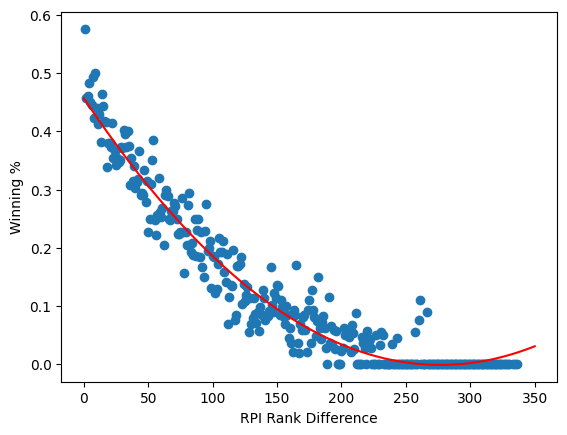

In [83]:
rpiModel = np.poly1d(np.polyfit(rpiStats['rpiRank'], rpiStats['favWonRpi'], 2))
line = np.linspace(0, 350, 100)
plt.plot(line, rpiModel(line), color='r')
plt.scatter(rpiStats['rpiRank'], rpiStats['favWonRpi'])
plt.xlabel('RPI Rank Difference')
plt.ylabel('Winning %')
plt.show()

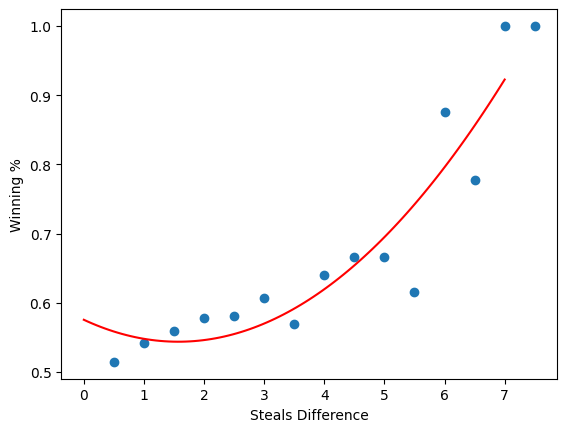

In [84]:
stModel = np.poly1d(np.polyfit(stStats['st'], stStats['favWonSt'], 2))
line = np.linspace(0, 7, 100)
plt.plot(line, stModel(line), color='r')
plt.scatter(stStats['st'], stStats['favWonSt'])
plt.xlabel('Steals Difference')
plt.ylabel('Winning %')
plt.show()

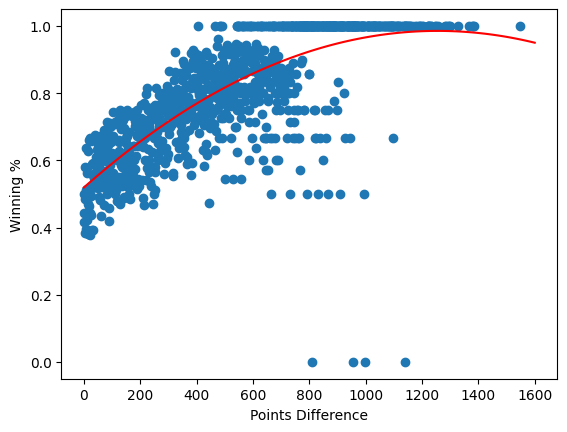

In [85]:
ptsModel = np.poly1d(np.polyfit(ptsStats['pts'], ptsStats['favWonPts'], 2))
line = np.linspace(0, 1600, 100)
plt.plot(line, ptsModel(line), color='r')
plt.scatter(ptsStats['pts'], ptsStats['favWonPts'])
plt.xlabel('Points Difference')
plt.ylabel('Winning %')
plt.show()

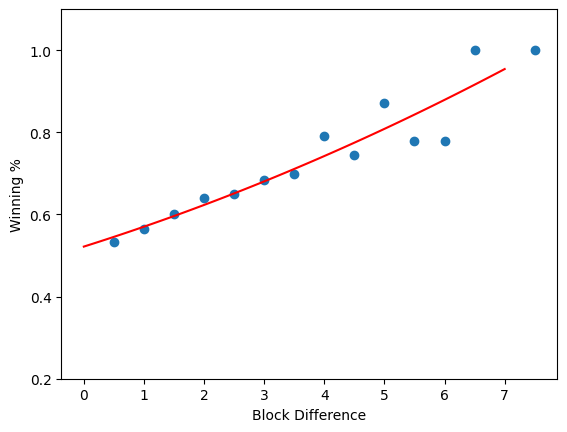

In [86]:
blksModel = np.poly1d(np.polyfit(blksStats['blks'], blksStats['favWonBlks'], 2))
line = np.linspace(0, 7, 100)
plt.plot(line, blksModel(line), color='r')
plt.scatter(blksStats['blks'], blksStats['favWonBlks'])
plt.ylim(0.2, 1.1)
plt.xlabel('Block Difference')
plt.ylabel('Winning %')
plt.show()

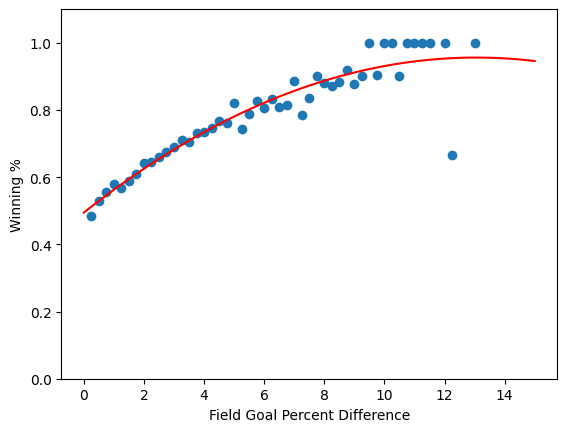

In [87]:
fgModel = np.poly1d(np.polyfit(fgStats['fg'], fgStats['favWonFg'], 2))
line = np.linspace(0, 15, 100)
plt.plot(line, fgModel(line), color='r')
plt.scatter(fgStats['fg'], fgStats['favWonFg'])
plt.ylim(0, 1.1)
plt.xlabel('Field Goal Percent Difference')
plt.ylabel('Winning %')
plt.show()

In [88]:
tourney_results = pd.read_csv("tourney_compact_results.csv")
tourney_results = tourney_results[tourney_results["season"] == 2014].reset_index()
tourney_results

,index,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,1849,2014,134,1107,71,1291,64,N,0
1,1850,2014,134,1301,74,1462,59,N,0
2,1851,2014,135,1142,81,1411,69,N,0
3,1852,2014,135,1397,78,1234,65,N,1
4,1853,2014,136,1163,89,1386,81,N,1
...,...,...,...,...,...,...,...,...,...
62,1911,2014,146,1163,60,1277,54,N,0
63,1912,2014,146,1246,75,1276,72,N,0
64,1913,2014,152,1163,63,1196,53,N,0
65,1914,2014,152,1246,74,1458,73,N,0


Za svaku utakmicu na turniru 2014. godine računamo razlike u rpiRanku, poenima, blokadama, postotku šuta i ukradenim loptama između dva tima tako što podatke uzimamo iz tablice teams_2014, gdje su nam spremljene sve te varijable za svaki tim 2014. godine

In [89]:
for index, row in tourney_results.iterrows():
    teamW = teams_2014.loc[teams_2014['team_id'] == row.wteam]
    teamL = teams_2014.loc[teams_2014['team_id'] == row.lteam]
    tourney_results.at[index, "pts"] = teamW['pts'].iloc[0] - teamL['pts'].iloc[0]
    tourney_results.at[index, "st"] = teamW['st'].iloc[0] - teamL['st'].iloc[0]
    tourney_results.at[index, "blks"] = teamW['blks'].iloc[0] - teamL['blks'].iloc[0]
    tourney_results.at[index, "fg"] = teamW['fg'].iloc[0] - teamL['fg'].iloc[0]
    tourney_results.at[index, "rpiRank"] = teamW['rpiRank'].iloc[0] - teamL['rpiRank'].iloc[0]


tourney_results['fg'] = np.round(tourney_results['fg'] / 0.25) * 0.25
tourney_results

,index,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,pts,st,blks,fg,rpiRank
0,1849,2014,134,1107,71,1291,64,N,0,-327.0,-1.5,0.0,-0.25,-9.0
1,1850,2014,134,1301,74,1462,59,N,0,24.0,-1.0,1.0,-1.25,-1.0
2,1851,2014,135,1142,81,1411,69,N,0,-542.0,1.0,-1.0,-5.50,-38.0
3,1852,2014,135,1397,78,1234,65,N,1,-368.0,-2.0,-0.5,-2.25,-18.0
4,1853,2014,136,1163,89,1386,81,N,1,91.0,2.5,1.5,-2.00,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1911,2014,146,1163,60,1277,54,N,0,-139.0,0.0,1.0,-2.75,8.0
63,1912,2014,146,1246,75,1276,72,N,0,126.0,0.0,3.5,-2.50,6.0
64,1913,2014,152,1163,63,1196,53,N,0,38.0,0.0,3.0,-1.25,20.0
65,1914,2014,152,1246,74,1458,73,N,0,154.0,0.0,2.5,-0.75,11.0


Sada za svaku varijablu računamo šansu za pobjedu s obzirom na istrenirani model te varijable, te je naša predikcija srednja vrijednost svih tih predikcija varijabli

In [90]:
for index, row in tourney_results.iterrows():
    if row['rpiRank'] >= 0:
        tourney_results.at[index, "rpiRankPred"] = rpiModel(row['rpiRank'])
    else:
        tourney_results.at[index, "rpiRankPred"] = 1 - rpiModel(row['rpiRank'])

    if row['pts'] >= 0:
        tourney_results.at[index, "ptsPred"] = ptsModel(row['pts'])
    else:
        tourney_results.at[index, "ptsPred"] = 1 - ptsModel(row['pts'])

    if row['st'] >= 0:
        tourney_results.at[index, "stPred"] = stModel(row['st'])
    else:
        tourney_results.at[index, "stPred"] = 1 - stModel(row['st'])

    if row['blks'] >= 0:
        tourney_results.at[index, "blksPred"] = blksModel(row['blks'])
    else:
        tourney_results.at[index, "blksPred"] = 1 - blksModel(row['blks'])

    if row['fg'] >= 0:
        tourney_results.at[index, "fgPred"] = fgModel(row['fg'])
    else:
        tourney_results.at[index, "fgPred"] = 1 - fgModel(row['fg'])

tourney_results["prediction"] = tourney_results[['rpiRankPred', 'ptsPred', 'fgPred', 'stPred', 'blksPred']].mean(axis=1)
tourney_results

,index,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,pts,st,blks,fg,rpiRank,rpiRankPred,ptsPred,stPred,blksPred,fgPred,prediction
0,1849,2014,134,1107,71,1291,64,N,0,-327.0,-1.5,0.0,-0.25,-9.0,0.512702,0.755524,0.335030,0.521756,0.523355,0.529673
1,1850,2014,134,1301,74,1462,59,N,0,24.0,-1.0,1.0,-1.25,-1.0,0.539645,0.536675,0.371278,0.570235,0.598108,0.523188
2,1851,2014,135,1142,81,1411,69,N,0,-542.0,1.0,-1.0,-5.50,-38.0,0.408619,0.970515,0.547980,0.522295,0.976235,0.685129
3,1852,2014,135,1397,78,1234,65,N,1,-368.0,-2.0,-0.5,-2.25,-18.0,0.481476,0.794411,0.292357,0.500823,0.678278,0.549469
4,1853,2014,136,1163,89,1386,81,N,1,91.0,2.5,1.5,-2.00,-9.0,0.512702,0.584164,0.554885,0.596134,0.657728,0.581123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1911,2014,146,1163,60,1277,54,N,0,-139.0,0.0,1.0,-2.75,8.0,0.430958,0.589951,0.575501,0.570235,0.720394,0.577408
63,1912,2014,146,1246,75,1276,72,N,0,126.0,0.0,3.5,-2.50,6.0,0.437407,0.607916,0.575501,0.710803,0.699167,0.606159
64,1913,2014,152,1163,63,1196,53,N,0,38.0,0.0,3.0,-1.25,20.0,0.393268,0.546818,0.575501,0.680475,0.598108,0.558834
65,1914,2014,152,1246,74,1458,73,N,0,154.0,0.0,2.5,-0.75,11.0,0.421374,0.626395,0.575501,0.651255,0.560055,0.566916


Dodajemo imena pobjednika i gubitnika

In [91]:
teams = pd.read_csv("teams.csv")
for index, row in tourney_results.iterrows():
    tourney_results.at[index, "wname"] = teams[teams['team_id'] == row['wteam']]['team_name'].iloc[0]
    tourney_results.at[index, "lname"] = teams[teams['team_id'] == row['lteam']]['team_name'].iloc[0]

tourney_results.drop(['index', 'season', 'daynum', 'wloc', 'numot'], axis=1, inplace=True)
tourney_results

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_40604\3903663594.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Albany NY' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tourney_results.at[index, "wname"] = teams[teams['team_id'] == row['wteam']]['team_name'].iloc[0]
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_40604\3903663594.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Mt St Mary's' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tourney_results.at[index, "lname"] = teams[teams['team_id'] == row['lteam']]['team_name'].iloc[0]


,wteam,wscore,lteam,lscore,pts,st,blks,fg,rpiRank,rpiRankPred,ptsPred,stPred,blksPred,fgPred,prediction,wname,lname
0,1107,71,1291,64,-327.0,-1.5,0.0,-0.25,-9.0,0.512702,0.755524,0.335030,0.521756,0.523355,0.529673,Albany NY,Mt St Mary's
1,1301,74,1462,59,24.0,-1.0,1.0,-1.25,-1.0,0.539645,0.536675,0.371278,0.570235,0.598108,0.523188,NC State,Xavier
2,1142,81,1411,69,-542.0,1.0,-1.0,-5.50,-38.0,0.408619,0.970515,0.547980,0.522295,0.976235,0.685129,Cal Poly SLO,TX Southern
3,1397,78,1234,65,-368.0,-2.0,-0.5,-2.25,-18.0,0.481476,0.794411,0.292357,0.500823,0.678278,0.549469,Tennessee,Iowa
4,1163,89,1386,81,91.0,2.5,1.5,-2.00,-9.0,0.512702,0.584164,0.554885,0.596134,0.657728,0.581123,Connecticut,St Joseph's PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1163,60,1277,54,-139.0,0.0,1.0,-2.75,8.0,0.430958,0.589951,0.575501,0.570235,0.720394,0.577408,Connecticut,Michigan St
63,1246,75,1276,72,126.0,0.0,3.5,-2.50,6.0,0.437407,0.607916,0.575501,0.710803,0.699167,0.606159,Kentucky,Michigan
64,1163,63,1196,53,38.0,0.0,3.0,-1.25,20.0,0.393268,0.546818,0.575501,0.680475,0.598108,0.558834,Connecticut,Florida
65,1246,74,1458,73,154.0,0.0,2.5,-0.75,11.0,0.421374,0.626395,0.575501,0.651255,0.560055,0.566916,Kentucky,Wisconsin


Na kraju ćemo ispisati koliko smo rezultata od koliko dobro predvidili, te koliki je to postotak

In [92]:
print("Predicted correct result for: " + str(
    len(tourney_results[tourney_results["prediction"] >= 0.5])) + " out of: " + str(len(tourney_results)) + " games")
print("Percentage of correct predictions: " + str(
    len(tourney_results[tourney_results["prediction"] >= 0.5]) / len(tourney_results)) + " %")

Predicted correct result for: 48 out of: 67 games
Percentage of correct predictions: 0.7164179104477612 %
